In [1]:
import collections

In [ ]:
from ast import literal_eval
from collections import defaultdict

import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from helpers.visualization import *
from scipy import spatial
from tqdm import tqdm
from upsetplot import from_indicators, plot

tqdm.pandas()

In [ ]:
# Add Arial
# Will differ by system, may need to install Arial font
font_manager.fontManager.addfont("/usr/share/fonts/truetype/arial/ARIAL.TTF")

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/arial/ARIAL.TTF'

Validation Dataset

In [ ]:
# Read in data
validation_data = pd.read_csv(
    "../data/output/validation_data_classified_all_3_methods.csv"
)

validation_data["chemsource_output_gpt-4o"] = validation_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: literal_eval(x))
validation_data["chemsource_output_gpt-4o_classification"] = validation_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: x[0])
validation_data["chemsource_output_gpt-4o_classprobs"] = validation_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: evaluate_probs(x[1]))
validation_upset_gpt4o = cs_output_to_upset_probs(
    validation_data,
    "chemsource_output_gpt-4o_classification",
    "chemsource_output_gpt-4o_classprobs",
)

validation_data["chemsource_output_deepseek-v3"] = validation_data[
    "chemsource_output_deepseek-v3"
].apply(lambda x: literal_eval(x))
validation_data["chemsource_output_deepseek-v3_classification"] = validation_data[
    "chemsource_output_deepseek-v3"
].apply(lambda x: x[0])
validation_data["chemsource_output_deepseek-v3_classprobs"] = validation_data[
    "chemsource_output_deepseek-v3"
].apply(lambda x: evaluate_probs(x[1]))
validation_upset_deepseekv3 = cs_output_to_upset_probs(
    validation_data,
    "chemsource_output_deepseek-v3_classification",
    "chemsource_output_deepseek-v3_classprobs",
)

validation_data["chemsource_output_gpt-4-1"] = validation_data[
    "chemsource_output_gpt-4-1"
].apply(lambda x: literal_eval(x))
validation_data["chemsource_output_gpt-4-1_classification"] = validation_data[
    "chemsource_output_gpt-4-1"
].apply(lambda x: x[0])
validation_data["chemsource_output_gpt-4-1_classprobs"] = validation_data[
    "chemsource_output_gpt-4-1"
].apply(lambda x: evaluate_probs(x[1]))
validation_upset_gpt41 = cs_output_to_upset_probs(
    validation_data,
    "chemsource_output_gpt-4-1_classification",
    "chemsource_output_gpt-4-1_classprobs",
)

/home/prajkumar/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)
/home/prajkumar/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)
/home/prajkumar/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

In [ ]:
validation_data["chemsource_output_search_gpt_classification"] = validation_data[
    "chemsource_output_search_gpt"
].apply(lambda x: x.split(";")[0][2:])

In [ ]:
validation_data["cleaned_manual"] = validation_data["manual_classification"].apply(
    lambda x: defaultdict(
        float, dict.fromkeys([item.strip() for item in x.upper().split(",")], 1.0)
    )
)
validation_data["cleaned_gpt4o"] = validation_data[
    "chemsource_output_gpt-4o_classprobs"
].apply(lambda x: defaultdict(float, x))
validation_data["cleaned_deepseekv3"] = validation_data[
    "chemsource_output_deepseek-v3_classprobs"
].apply(lambda x: defaultdict(float, x))
validation_data["cleaned_gpt41"] = validation_data[
    "chemsource_output_gpt-4-1_classprobs"
].apply(lambda x: defaultdict(float, x))

validation_data_gpt4o_classified = validation_data
validation_data_gpt4o_classified["chemsource_output_gpt-4o_classification"] = (
    validation_data_gpt4o_classified[
        "chemsource_output_gpt-4o_classification"
    ].apply(lambda x: x.split(","))
)
validation_data_gpt4o_classified = validation_data_gpt4o_classified[
    ~validation_data_gpt4o_classified["chemsource_output_gpt-4o_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]

validation_data_deepseek_classified = validation_data
validation_data_deepseek_classified["chemsource_output_deepseek-v3_classification"] = (
    validation_data_deepseek_classified[
        "chemsource_output_deepseek-v3_classification"
    ].apply(lambda x: x.split(","))
)
validation_data_deepseek_classified = validation_data_deepseek_classified[
    ~validation_data_deepseek_classified[
        "chemsource_output_deepseek-v3_classification"
    ].apply(lambda x: isinstance(x, list) and "INFO" in x)
]

validation_data_gpt41_classified = validation_data
validation_data_gpt41_classified["chemsource_output_gpt-4-1_classification"] = (
    validation_data_gpt41_classified[
        "chemsource_output_gpt-4-1_classification"
    ].apply(lambda x: x.split(","))
)
validation_data_gpt41_classified = validation_data_gpt41_classified[
    ~validation_data_gpt41_classified["chemsource_output_gpt-4-1_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]
validation_data_gpt41_classified = validation_data_gpt41_classified[
    ~validation_data_gpt41_classified["chemsource_output_gpt-4-1_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]

In [ ]:
validation_data_search_gpt_classified = validation_data
validation_data_search_gpt_classified["chemsource_output_search_gpt_classification"] = (
    validation_data_search_gpt_classified[
        "chemsource_output_search_gpt_classification"
    ].apply(lambda x: x.split(","))
)
validation_data["cleaned_search_gpt"] = validation_data[
    "chemsource_output_search_gpt_classification"
].apply(lambda x: defaultdict(float, dict.fromkeys(x, 1.0)))
validation_data_search_gpt_classified = validation_data_search_gpt_classified[
    ~validation_data_search_gpt_classified[
        "chemsource_output_search_gpt_classification"
    ].apply(lambda x: isinstance(x, list) and "INFO" in x)
]

In [ ]:
validation_data_by_model = [
    validation_data_gpt4o_classified,
    validation_data_deepseek_classified,
    validation_data_gpt41_classified,
    validation_data_search_gpt_classified,
]
model_class_columns = [
    "cleaned_gpt4o",
    "cleaned_deepseekv3",
    "cleaned_gpt41",
    "cleaned_search_gpt",
]
score_distributions = []
for i, dataframe in enumerate(validation_data_by_model):
    dataframe["manual_list"] = dataframe["cleaned_manual"].apply(
        lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]]
    )
    dataframe["model_list"] = dataframe[model_class_columns[i]].apply(
        lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]]
    )
    # Drop dataframe rows where sum(manual_list) = 0 and sum(model_list) = 0
    dataframe = dataframe[
        (dataframe["manual_list"].apply(sum) > 0)
        & (dataframe["model_list"].apply(sum) > 0)
    ]
    manual_predictions = dataframe["manual_list"]
    model_predictions = dataframe["model_list"].apply(
        lambda x: [1 if i > 0.5 else 0 for i in x]
    )
    jaccard_scores = [
        sklearn.metrics.jaccard_score(manual, model, average="binary")
        for manual, model in zip(manual_predictions, model_predictions)
    ]
    jaccard_scores_pubmed = [
        score
        for score, site in zip(jaccard_scores, dataframe["site"])
        if site == "PUBMED"
    ]
    jaccard_scores_wikipedia = [
        score
        for score, site in zip(jaccard_scores, dataframe["site"])
        if site == "WIKIPEDIA"
    ]
    score_distributions.append((jaccard_scores_pubmed, jaccard_scores_wikipedia))

validation_data_gpt4o_classified["manual_list"] = validation_data_gpt4o_classified[
    "cleaned_manual"
].apply(
    lambda x: [
        x["INDUSTRIAL"],
        x["ENDOGENOUS"],
        x["FOOD"],
        x["PERSONAL CARE"],
        x["MEDICAL"],
    ]
)
validation_data_gpt4o_classified["gpt4o_list"] = validation_data_gpt4o_classified[
    "cleaned_gpt4o"
].apply(
    lambda x: [
        x["INDUSTRIAL"],
        x["ENDOGENOUS"],
        x["FOOD"],
        x["PERSONAL CARE"],
        x["MEDICAL"],
    ]
)
validation_data_gpt4o_classified["cosine_similarity"] = (
    validation_data_gpt4o_classified.apply(
        lambda x: 1 - spatial.distance.cosine(x["manual_list"], x["gpt4o_list"]), axis=1
    )
)
gpt4o_cosines = validation_data_gpt4o_classified[["cosine_similarity", "site"]].dropna(
    subset=["cosine_similarity"], axis=0
)
gpt4o_cosines_pubmed = gpt4o_cosines[gpt4o_cosines["site"] == "PUBMED"]
gpt4o_cosines_pubmed.drop(columns=["site"], inplace=True)
gpt4o_cosines_wikipedia = gpt4o_cosines[gpt4o_cosines["site"] == "WIKIPEDIA"]
gpt4o_cosines_wikipedia.drop(columns=["site"], inplace=True)

validation_data_deepseek_classified["manual_list"] = (
    validation_data_deepseek_classified["cleaned_manual"].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
)
validation_data_deepseek_classified["deepseek_list"] = (
    validation_data_deepseek_classified["cleaned_deepseekv3"].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
)
validation_data_deepseek_classified["cosine_similarity"] = (
    validation_data_deepseek_classified.apply(
        lambda x: 1 - spatial.distance.cosine(x["manual_list"], x["deepseek_list"]),
        axis=1,
    )
)
deepseek_cosines = validation_data_deepseek_classified[
    ["cosine_similarity", "site"]
].dropna(subset=["cosine_similarity"], axis=0)
deepseek_cosines_pubmed = deepseek_cosines[deepseek_cosines["site"] == "PUBMED"]
deepseek_cosines_pubmed.drop(columns=["site"], inplace=True)
deepseek_cosines_wikipedia = deepseek_cosines[deepseek_cosines["site"] == "WIKIPEDIA"]
deepseek_cosines_wikipedia.drop(columns=["site"], inplace=True)

validation_data_gpt41_classified["manual_list"] = validation_data_gpt41_classified[
    "cleaned_manual"
].apply(
    lambda x: [
        x["INDUSTRIAL"],
        x["ENDOGENOUS"],
        x["FOOD"],
        x["PERSONAL CARE"],
        x["MEDICAL"],
    ]
)
validation_data_gpt41_classified["gpt41_list"] = validation_data_gpt41_classified[
    "cleaned_gpt41"
].apply(
    lambda x: [
        x["INDUSTRIAL"],
        x["ENDOGENOUS"],
        x["FOOD"],
        x["PERSONAL CARE"],
        x["MEDICAL"],
    ]
)
validation_data_gpt41_classified["cosine_similarity"] = (
    validation_data_gpt41_classified.apply(
        lambda x: 1 - spatial.distance.cosine(x["manual_list"], x["gpt41_list"]), axis=1
    )
)
gpt41_cosines = validation_data_gpt41_classified[["cosine_similarity", "site"]].dropna(
    subset=["cosine_similarity"], axis=0
)
gpt41_cosines_pubmed = gpt41_cosines[gpt41_cosines["site"] == "PUBMED"]
gpt41_cosines_pubmed.drop(columns=["site"], inplace=True)
gpt41_cosines_wikipedia = gpt41_cosines[gpt41_cosines["site"] == "WIKIPEDIA"]
gpt41_cosines_wikipedia.drop(columns=["site"], inplace=True)

validation_data_search_gpt_classified["manual_list"] = (
    validation_data_search_gpt_classified["cleaned_manual"].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
)
validation_data_search_gpt_classified["search_gpt_list"] = (
    validation_data_search_gpt_classified["cleaned_search_gpt"].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
)
validation_data_search_gpt_classified["cosine_similarity"] = (
    validation_data_search_gpt_classified.apply(
        lambda x: 1 - spatial.distance.cosine(x["manual_list"], x["search_gpt_list"]),
        axis=1,
    )
)
search_gpt_cosines = validation_data_search_gpt_classified[
    ["cosine_similarity", "site"]
].dropna(subset=["cosine_similarity"], axis=0)
search_gpt_cosines_pubmed = search_gpt_cosines[search_gpt_cosines["site"] == "PUBMED"]
search_gpt_cosines_pubmed.drop(columns=["site"], inplace=True)
search_gpt_cosines_wikipedia = search_gpt_cosines[
    search_gpt_cosines["site"] == "WIKIPEDIA"
]
search_gpt_cosines_wikipedia.drop(columns=["site"], inplace=True)

# original_count = len(validation_data)
# plt.hist([gpt4o_cosines_wikipedia["cosine_similarity"], gpt4o_cosines_pubmed["cosine_similarity"]], bins=50, label=["Wikipedia", "PubMed"], color=["tab:blue", "tab:orange"], alpha=1, stacked=True)
# plt.legend()
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Count")
# plt.title(f"Cosine Similarity Distribution (GPT-4o with RAG)\n Mean Cosine Similarity: {gpt4o_cosines['cosine_similarity'].mean():.2f}±{gpt4o_cosines['cosine_similarity'].std():.2f}\n Rejection Rate: {1 - len(gpt4o_cosines) / original_count:.2%}")
# plt.show()

# plt.hist([deepseek_cosines_wikipedia["cosine_similarity"], deepseek_cosines_pubmed["cosine_similarity"]], bins=50, label=["Wikipedia", "PubMed"], color=["tab:blue", "tab:orange"], alpha=1, stacked=True)
# plt.legend()
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Count")
# plt.title(f"Cosine Similarity Distribution (DeepSeek with RAG)\n Mean Cosine Similarity: {deepseek_cosines['cosine_similarity'].mean():.2f}±{deepseek_cosines['cosine_similarity'].std():.2f}")
# plt.show()

# plt.hist([gpt41_cosines_wikipedia["cosine_similarity"], gpt41_cosines_pubmed["cosine_similarity"]], bins=50, label=["Wikipedia", "PubMed"], color=["tab:blue", "tab:orange"], alpha=1, stacked=True)
# plt.legend()
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Count")
# plt.title(f"Cosine Similarity Distribution (GPT-4.1, No RAG)\n Mean Cosine Similarity: {gpt41_cosines['cosine_similarity'].mean():.2f}±{gpt41_cosines['cosine_similarity'].std():.2f}")
# plt.show()

# plt.hist([search_gpt_cosines_wikipedia["cosine_similarity"], search_gpt_cosines_pubmed["cosine_similarity"]], bins=50, label=["Wikipedia", "PubMed"], color=["tab:blue", "tab:orange"], alpha=1, stacked=True)
# plt.legend()
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Count")
# plt.title(f"Cosine Similarity Distribution (ChatGPT Search)\n Mean Cosine Similarity: {search_gpt_cosines['cosine_similarity'].mean():.2f}±{search_gpt_cosines['cosine_similarity'].std():.2f}")
# plt.show()


# plt.clf()
# # Make one plot with all cosine similarities, concatenate Wikipedia and PubMed
# plt.hist(gpt4o_cosines["cosine_similarity"], bins=50, color="tab:blue", alpha=0.5, label="GPT-4o with RAG")
# #plt.hist(deepseek_cosines["cosine_similarity"], bins=50, color="tab:orange", alpha=0.5, label="DeepSeek with RAG")
# plt.hist(gpt41_cosines["cosine_similarity"], bins=50, color="tab:green", alpha=0.5, label="GPT-4.1, No RAG")
# #plt.hist(search_gpt_cosines["cosine_similarity"], bins=50, color="tab:red", alpha=0.5, label="ChatGPT Search")
# plt.legend()
# plt.xlabel("Cosine Similarity")
# plt.ylabel("Count")
# plt.title("Cosine Similarity Distribution for All Methods")
# plt.show()

/tmp/ipykernel_5634/2329625065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["manual_list"] = dataframe["cleaned_manual"].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
/tmp/ipykernel_5634/2329625065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["model_list"] = dataframe[model_class_columns[i]].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
/tmp/ipykernel_5634/2329625065.py:5: SettingWithCopyWarning: 
A v

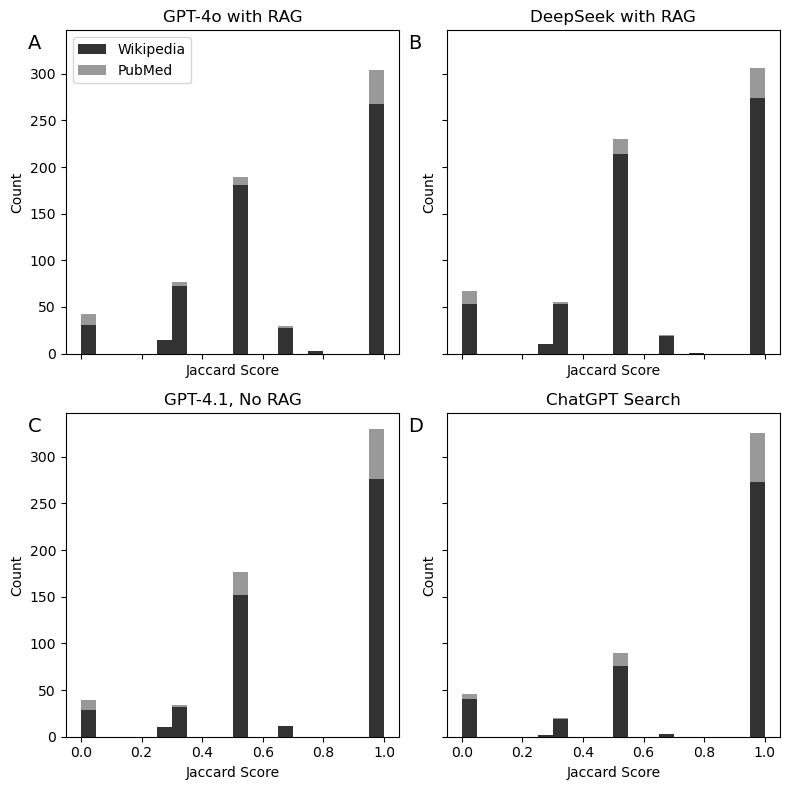

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
# ravel the axes for easier indexing
ax = ax.ravel()

plot_titles = [
    "GPT-4o with RAG",
    "DeepSeek with RAG",
    "GPT-4.1, No RAG",
    "ChatGPT Search",
]
letters = ["A", "B", "C", "D"]
for i in range(len(ax)):
    ax[i].hist(
        [score_distributions[i][1], score_distributions[i][0]],
        bins=20,
        color=[(0.2, 0.2, 0.2), (0.6, 0.6, 0.6)],
        alpha=1,
        label=["Wikipedia", "PubMed"],
        stacked=True,
    )
    ax[i].set_title(plot_titles[i])
    ax[i].set_xlabel("Jaccard Score")
    ax[i].set_ylabel("Count")
    ax[i].text(
        -0.115,
        0.99,
        letters[i],
        transform=ax[i].transAxes,
        fontsize=14,
        va="top",
        ha="left",
    )

ax[0].legend()
plt.tight_layout()

In [ ]:
for i in range(len(score_distributions)):
    print(
        f"{plot_titles[i]}: Mean Jaccard Score (Wikipedia): {np.mean(score_distributions[i][1]):.2f}±{np.std(score_distributions[i][1]):.2f}, Mean Jaccard Score (PubMed): {np.mean(score_distributions[i][0]):.2f}±{np.std(score_distributions[i][0]):.2f}"
    )
    total_mean = np.concatenate(
        (score_distributions[i][0], score_distributions[i][1])
    ).mean()
    total_std = np.concatenate(
        (score_distributions[i][0], score_distributions[i][1])
    ).std()
    print(
        f"{plot_titles[i]}: Mean Jaccard Score (Total): {total_mean:.2f}±{total_std:.2f}"
    )

GPT-4o with RAG: Mean Jaccard Score (Wikipedia): 0.68±0.31, Mean Jaccard Score (PubMed): 0.69±0.39
GPT-4o with RAG: Mean Jaccard Score (Total): 0.68±0.32
DeepSeek with RAG: Mean Jaccard Score (Wikipedia): 0.66±0.33, Mean Jaccard Score (PubMed): 0.64±0.40
DeepSeek with RAG: Mean Jaccard Score (Total): 0.66±0.34
GPT-4.1, No RAG: Mean Jaccard Score (Wikipedia): 0.73±0.32, Mean Jaccard Score (PubMed): 0.74±0.35
GPT-4.1, No RAG: Mean Jaccard Score (Total): 0.73±0.32
ChatGPT Search: Mean Jaccard Score (Wikipedia): 0.77±0.34, Mean Jaccard Score (PubMed): 0.82±0.32
ChatGPT Search: Mean Jaccard Score (Total): 0.78±0.34


/tmp/ipykernel_5634/3160717070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["manual_list_MEDICAL"] = dataframe["cleaned_manual"].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"], x["MEDICAL"]])
/tmp/ipykernel_5634/3160717070.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["model_list_MEDICAL"] = dataframe[model_class_columns[i]].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"], x["MEDICAL"]])
/tmp/ipykernel_5634/3

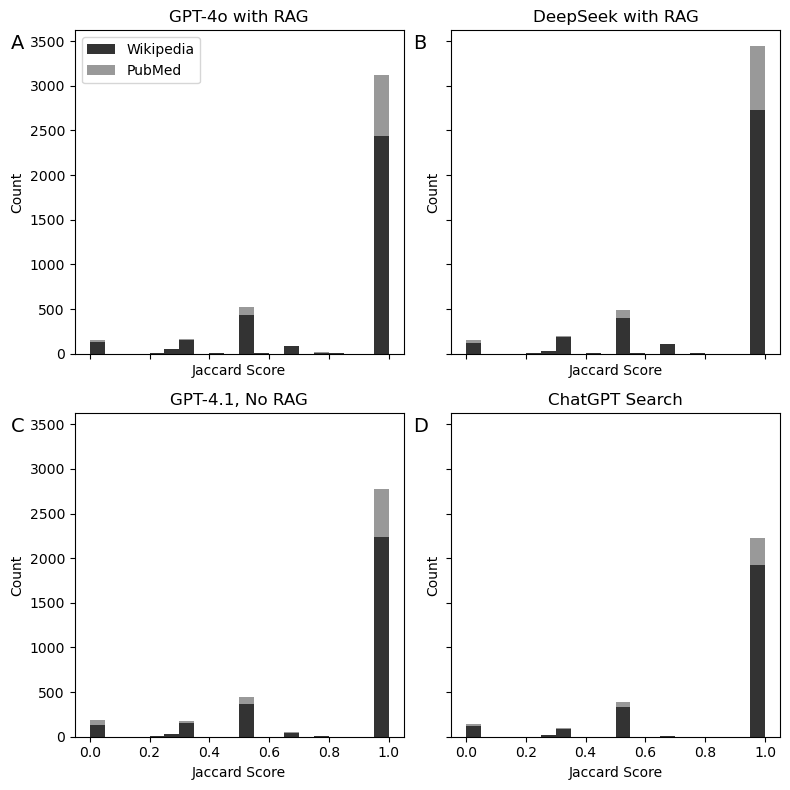

In [ ]:
# Plot Score Distributions without MEDICAL filtered out

score_distributions_with_medical = []
for i, dataframe in enumerate(validation_data_by_model):
    dataframe["manual_list_MEDICAL"] = dataframe["cleaned_manual"].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
    dataframe["model_list_MEDICAL"] = dataframe[model_class_columns[i]].apply(
        lambda x: [
            x["INDUSTRIAL"],
            x["ENDOGENOUS"],
            x["FOOD"],
            x["PERSONAL CARE"],
            x["MEDICAL"],
        ]
    )
    # Drop dataframe rows where sum(manual_list) = 0 and sum(model_list) = 0
    dataframe = dataframe[
        (dataframe["manual_list_MEDICAL"].apply(sum) > 0)
        & (dataframe["model_list_MEDICAL"].apply(sum) > 0)
    ]
    manual_predictions = dataframe["manual_list_MEDICAL"]
    model_predictions = dataframe["model_list_MEDICAL"].apply(
        lambda x: [1 if i > 0.5 else 0 for i in x]
    )
    jaccard_scores = [
        sklearn.metrics.jaccard_score(manual, model, average="binary")
        for manual, model in zip(manual_predictions, model_predictions)
    ]
    jaccard_scores_pubmed = [
        score
        for score, site in zip(jaccard_scores, dataframe["site"])
        if site == "PUBMED"
    ]
    jaccard_scores_wikipedia = [
        score
        for score, site in zip(jaccard_scores, dataframe["site"])
        if site == "WIKIPEDIA"
    ]
    score_distributions_with_medical.append(
        (jaccard_scores_pubmed, jaccard_scores_wikipedia)
    )


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
# ravel the axes for easier indexing
ax = ax.ravel()

plot_titles = [
    "GPT-4o with RAG",
    "DeepSeek with RAG",
    "GPT-4.1, No RAG",
    "ChatGPT Search",
]
letters = ["A", "B", "C", "D"]
for i in range(len(ax)):
    ax[i].hist(
        [
            score_distributions_with_medical[i][1],
            score_distributions_with_medical[i][0],
        ],
        bins=20,
        color=[(0.2, 0.2, 0.2), (0.6, 0.6, 0.6)],
        alpha=1,
        label=["Wikipedia", "PubMed"],
        stacked=True,
    )
    ax[i].set_title(plot_titles[i])
    ax[i].set_xlabel("Jaccard Score")
    ax[i].set_ylabel("Count")
    if i == 0 or i == 2:
        ax[i].text(
            -0.195,
            0.99,
            letters[i],
            transform=ax[i].transAxes,
            fontsize=14,
            va="top",
            ha="left",
        )
    else:
        ax[i].text(
            -0.115,
            0.99,
            letters[i],
            transform=ax[i].transAxes,
            fontsize=14,
            va="top",
            ha="left",
        )

ax[0].legend()
plt.tight_layout()

In [ ]:
for i in range(len(score_distributions_with_medical)):
    print(
        f"{plot_titles[i]}: Mean Jaccard Score (Wikipedia): {np.mean(score_distributions_with_medical[i][1]):.2f}±{np.std(score_distributions_with_medical[i][1]):.2f}, Mean Jaccard Score (PubMed): {np.mean(score_distributions_with_medical[i][0]):.2f}±{np.std(score_distributions_with_medical[i][0]):.2f}"
    )
    total_mean = np.concatenate(
        (score_distributions_with_medical[i][0], score_distributions_with_medical[i][1])
    ).mean()
    total_std = np.concatenate(
        (score_distributions_with_medical[i][0], score_distributions_with_medical[i][1])
    ).std()
    print(
        f"{plot_titles[i]}: Mean Jaccard Score (Total): {total_mean:.2f}±{total_std:.2f}"
    )

GPT-4o with RAG: Mean Jaccard Score (Wikipedia): 0.84±0.29, Mean Jaccard Score (PubMed): 0.89±0.25
GPT-4o with RAG: Mean Jaccard Score (Total): 0.85±0.28
DeepSeek with RAG: Mean Jaccard Score (Wikipedia): 0.86±0.27, Mean Jaccard Score (PubMed): 0.89±0.25
DeepSeek with RAG: Mean Jaccard Score (Total): 0.86±0.27
GPT-4.1, No RAG: Mean Jaccard Score (Wikipedia): 0.84±0.29, Mean Jaccard Score (PubMed): 0.84±0.31
GPT-4.1, No RAG: Mean Jaccard Score (Total): 0.84±0.29
ChatGPT Search: Mean Jaccard Score (Wikipedia): 0.86±0.28, Mean Jaccard Score (PubMed): 0.82±0.32
ChatGPT Search: Mean Jaccard Score (Total): 0.85±0.29


In [ ]:
for i in range(len(score_distributions_with_medical)):
    print(f"{plot_titles[i]}")
    print(
        len(
            np.concatenate(
                (
                    score_distributions_with_medical[i][0],
                    score_distributions_with_medical[i][1],
                )
            )
        )
        - len(np.concatenate((score_distributions[i][0], score_distributions[i][1])))
    )
    print(len(np.concatenate((score_distributions[i][0], score_distributions[i][1]))))

GPT-4o with RAG
3495
660
DeepSeek with RAG
3779
689
GPT-4.1, No RAG
3079
602
ChatGPT Search
2401
487


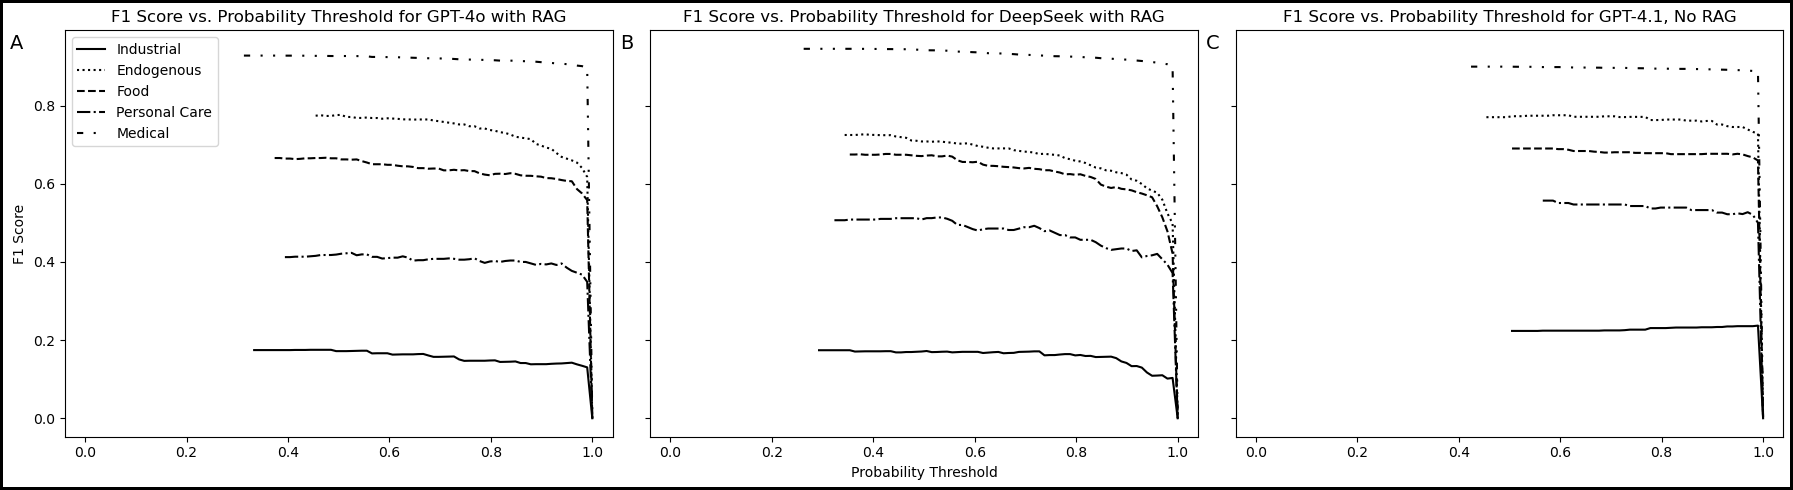

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)
fig.patch.set_linewidth(4)
fig.patch.set_edgecolor("black")


y_true = np.array(validation_data_gpt4o_classified["manual_list"].tolist())
y_pred = np.array(validation_data_gpt4o_classified["gpt4o_list"].tolist())
# Threshold at 0.5 for binary classification
y_true_thresh = (y_true > 0.5).astype(int)
y_pred_thresh = (y_pred > 0.5).astype(int)
# Confusion Matrix
cm_gpt4o = sklearn.metrics.multilabel_confusion_matrix(y_true_thresh, y_pred_thresh)
# Compute f1 score for each class
f1_scores_gpt4o = sklearn.metrics.f1_score(y_true_thresh, y_pred_thresh, average=None)

linspace = np.linspace(0, 1, 100)
f1_scores = []

min_prob_loc_0 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 0]), 1)[1]
).min()
min_prob_loc_1 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 1]), 1)[1]
).min()
min_prob_loc_2 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 2]), 1)[1]
).min()
min_prob_loc_3 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 3]), 1)[1]
).min()
min_prob_loc_4 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 4]), 1)[1]
).min()


for threshold in linspace:
    y_true_thresh = (y_true).astype(int)
    y_pred_thresh = (y_pred > threshold).astype(int)
    f1_scores.append(
        sklearn.metrics.f1_score(y_true_thresh, y_pred_thresh, average=None)
    )
f1_scores = np.array(f1_scores)
ax[0].plot(
    linspace[min_prob_loc_0:],
    f1_scores[min_prob_loc_0:, 0],
    label="Industrial",
    color="black",
    linestyle="-",
)
ax[0].plot(
    linspace[min_prob_loc_1:],
    f1_scores[min_prob_loc_1:, 1],
    label="Endogenous",
    color="black",
    linestyle=":",
)
ax[0].plot(
    linspace[min_prob_loc_2:],
    f1_scores[min_prob_loc_2:, 2],
    label="Food",
    color="black",
    linestyle="--",
)
ax[0].plot(
    linspace[min_prob_loc_3:],
    f1_scores[min_prob_loc_3:, 3],
    label="Personal Care",
    color="black",
    linestyle="-.",
)
ax[0].plot(
    linspace[min_prob_loc_4:],
    f1_scores[min_prob_loc_4:, 4],
    label="Medical",
    color="black",
    linestyle=(0, (3, 5, 1, 5, 1, 5)),
)
ax[0].set_ylabel("F1 Score")
ax[0].set_title("F1 Score vs. Probability Threshold for GPT-4o with RAG")
ax[0].text(-0.1, 0.99, "A", transform=ax[0].transAxes, fontsize=14, va="top", ha="left")
ax[0].set_xlim(-0.04, 1.04)

# ax.legend()
# plt.show()
# plt.clf()


y_true = np.array(validation_data_deepseek_classified["manual_list"].tolist())
y_pred = np.array(validation_data_deepseek_classified["deepseek_list"].tolist())
# Threshold at 0.5 for binary classification
y_true_thresh = (y_true > 0.5).astype(int)
y_pred_thresh = (y_pred > 0.5).astype(int)
# Confusion Matrix
cm_deepseek = sklearn.metrics.multilabel_confusion_matrix(y_true_thresh, y_pred_thresh)
# Compute f1 score for each class
f1_scores_deepseek = sklearn.metrics.f1_score(
    y_true_thresh, y_pred_thresh, average=None
)

linspace = np.linspace(0, 1, 100)
f1_scores = []
for threshold in linspace:
    y_true_thresh = (y_true).astype(int)
    y_pred_thresh = (y_pred > threshold).astype(int)
    f1_scores.append(
        sklearn.metrics.f1_score(y_true_thresh, y_pred_thresh, average=None)
    )
f1_scores = np.array(f1_scores)

min_prob_loc_0 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 0]), 1)[1]
).min()
min_prob_loc_1 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 1]), 1)[1]
).min()
min_prob_loc_2 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 2]), 1)[1]
).min()
min_prob_loc_3 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 3]), 1)[1]
).min()
min_prob_loc_4 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 4]), 1)[1]
).min()


ax[1].plot(
    linspace[min_prob_loc_0:],
    f1_scores[min_prob_loc_0:, 0],
    label="Industrial",
    color="black",
    linestyle="-",
)
ax[1].plot(
    linspace[min_prob_loc_1:],
    f1_scores[min_prob_loc_1:, 1],
    label="Endogenous",
    color="black",
    linestyle=":",
)
ax[1].plot(
    linspace[min_prob_loc_2:],
    f1_scores[min_prob_loc_2:, 2],
    label="Food",
    color="black",
    linestyle="--",
)
ax[1].plot(
    linspace[min_prob_loc_3:],
    f1_scores[min_prob_loc_3:, 3],
    label="Personal Care",
    color="black",
    linestyle="-.",
)
ax[1].plot(
    linspace[min_prob_loc_4:],
    f1_scores[min_prob_loc_4:, 4],
    label="Medical",
    color="black",
    linestyle=(0, (3, 5, 1, 5, 1, 5)),
)
ax[1].set_xlabel("Probability Threshold")
ax[1].set_title("F1 Score vs. Probability Threshold for DeepSeek with RAG")
ax[1].text(
    -0.055, 0.99, "B", transform=ax[1].transAxes, fontsize=14, va="top", ha="left"
)
ax[1].set_xlim(-0.04, 1.04)

# plt.legend()
# plt.show()
# plt.clf()


y_true = np.array(validation_data_gpt41_classified["manual_list"].tolist())
y_pred = np.array(validation_data_gpt41_classified["gpt41_list"].tolist())
# Threshold at 0.5 for binary classification
y_true_thresh = (y_true > 0.5).astype(int)
y_pred_thresh = (y_pred > 0.5).astype(int)
# Confusion Matrix
cm_gpt41 = sklearn.metrics.multilabel_confusion_matrix(y_true_thresh, y_pred_thresh)
# Compute f1 score for each class
f1_scores_gpt41 = sklearn.metrics.f1_score(y_true_thresh, y_pred_thresh, average=None)
linspace = np.linspace(0, 1, 100)
f1_scores = []
for threshold in linspace:
    y_true_thresh = (y_true).astype(int)
    y_pred_thresh = (y_pred > threshold).astype(int)
    f1_scores.append(
        sklearn.metrics.f1_score(y_true_thresh, y_pred_thresh, average=None)
    )
f1_scores = np.array(f1_scores)

min_prob_loc_0 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 0]), 1)[1]
).min()
min_prob_loc_1 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 1]), 1)[1]
).min()
min_prob_loc_2 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 2]), 1)[1]
).min()
min_prob_loc_3 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 3]), 1)[1]
).min()
min_prob_loc_4 = np.argwhere(
    linspace > np.partition(np.unique(y_pred[:, 4]), 1)[1]
).min()

ax[2].plot(
    linspace[min_prob_loc_0:],
    f1_scores[min_prob_loc_0:, 0],
    label="Industrial",
    color="black",
    linestyle="-",
)
ax[2].plot(
    linspace[min_prob_loc_1:],
    f1_scores[min_prob_loc_1:, 1],
    label="Endogenous",
    color="black",
    linestyle=":",
)
ax[2].plot(
    linspace[min_prob_loc_2:],
    f1_scores[min_prob_loc_2:, 2],
    label="Food",
    color="black",
    linestyle="--",
)
ax[2].plot(
    linspace[min_prob_loc_3:],
    f1_scores[min_prob_loc_3:, 3],
    label="Personal Care",
    color="black",
    linestyle="-.",
)
ax[2].plot(
    linspace[min_prob_loc_4:],
    f1_scores[min_prob_loc_4:, 4],
    label="Medical",
    color="black",
    linestyle=(0, (3, 5, 1, 5, 1, 5)),
)
ax[2].set_title("F1 Score vs. Probability Threshold for GPT-4.1, No RAG")
ax[2].text(
    -0.055, 0.99, "C", transform=ax[2].transAxes, fontsize=14, va="top", ha="left"
)
ax[2].set_xlim(-0.04, 1.04)

ax[0].legend(loc="upper left", bbox_to_anchor=(0, 1), fontsize=10)
plt.tight_layout()
plt.show()
plt.clf()


y_true = np.array(validation_data_search_gpt_classified["manual_list"].tolist())
y_pred = np.array(validation_data_search_gpt_classified["search_gpt_list"].tolist())
# Confusion Matrix
cm_searchgpt = sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred)
# Compute f1 score for each class
f1_scores_searchgpt = sklearn.metrics.f1_score(y_true, y_pred, average=None)

GPT-4o F1 Scores: [0.17177914 0.77633478 0.66382979 0.42105263 0.92699884]
Average GPT-4o F1 Score: 0.5919990355007018
DeepSeek F1 Scores: [0.17208413 0.70838881 0.67226891 0.51211073 0.94185635]
Average DeepSeek F1 Score: 0.6013417860247958
GPT-4.1 F1 Scores: [0.2234957  0.77294686 0.69033048 0.55462185 0.89965911]
Average GPT-4.1 F1 Score: 0.6282107991512765
ChatGPT Search F1 Scores: [0.35862069 0.77595628 0.66298343 0.4180791  0.88674608]
Average ChatGPT Search F1 Score: 0.6204771144061667


/tmp/ipykernel_5634/1475567291.py:40: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=dataframe_f1_scores_long, x="Class", y="F1 Score", hue="Model", palette=alternating_grayscale, ax=ax[0])


4953


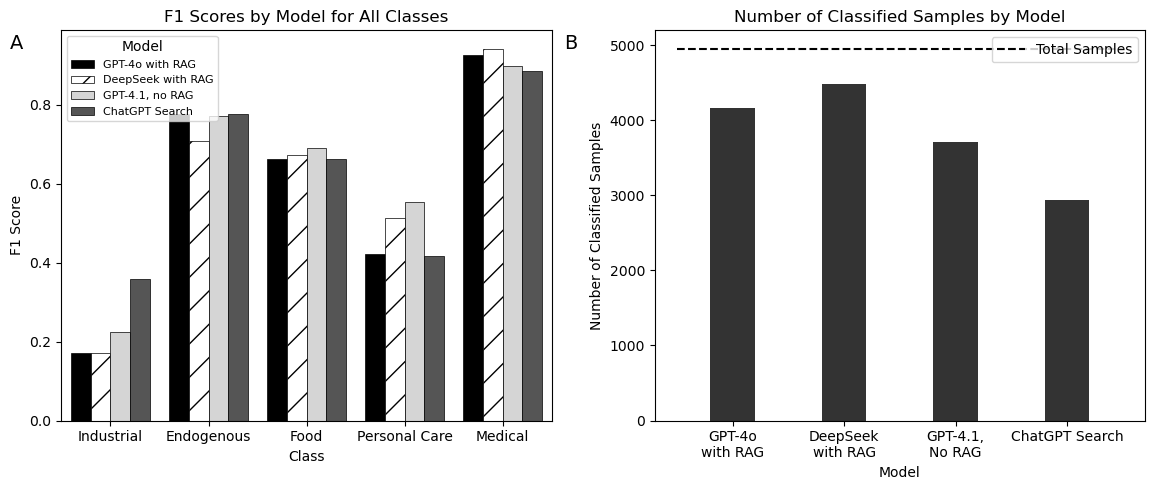

In [ ]:
print("GPT-4o F1 Scores:", f1_scores_gpt4o)
print("Average GPT-4o F1 Score:", np.mean(f1_scores_gpt4o))
print("DeepSeek F1 Scores:", f1_scores_deepseek)
print("Average DeepSeek F1 Score:", np.mean(f1_scores_deepseek))
print("GPT-4.1 F1 Scores:", f1_scores_gpt41)
print("Average GPT-4.1 F1 Score:", np.mean(f1_scores_gpt41))
print("ChatGPT Search F1 Scores:", f1_scores_searchgpt)
print("Average ChatGPT Search F1 Score:", np.mean(f1_scores_searchgpt))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=5)


# Plot F1 scores as bar chart by class
# Plot F1 scores as bar chart by class
dataframe_f1_scores = pd.DataFrame(
    {
        "GPT-4o with RAG": f1_scores_gpt4o,
        "DeepSeek with RAG": f1_scores_deepseek,
        "GPT-4.1, no RAG": f1_scores_gpt41,
        "ChatGPT Search": f1_scores_searchgpt,
    },
    index=["Industrial", "Endogenous", "Food", "Personal Care", "Medical"],
)
dataframe_f1_scores_long = dataframe_f1_scores.reset_index().melt(
    id_vars="index", var_name="Model", value_name="F1 Score"
)
dataframe_f1_scores_long.rename(columns={"index": "Class"}, inplace=True)
grayscale = sns.color_palette("gray", 5)

# Alternate colors from both ends: dark, light, 2nd-dark, 2nd-light, middle
alternating_grayscale = [
    (0, 0, 0),  # darkest
    (1.0, 1.0, 1.0),
    grayscale[4],  # 2nd darkest
    grayscale[1],  # 2nd lightest
    grayscale[3],  # middle
]
# ax = plt.gca()
# ax.set_axisbelow(True)

# plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')
sns.barplot(
    data=dataframe_f1_scores_long,
    x="Class",
    y="F1 Score",
    hue="Model",
    palette=alternating_grayscale,
    ax=ax[0],
)
hatch_patterns = ["/", "\\", "x", "-", "o"]
for i, patch in enumerate(ax[0].patches):
    patch.set_edgecolor("black")
    patch.set_linewidth(0.5)
    # get patch color
    color = patch.get_facecolor()
    if color == (1.0, 1.0, 1.0, 1.0):
        patch.set_hatch("/")
ax[0].legend(loc="upper left", bbox_to_anchor=(0, 1), title="Model", fontsize=8)
ax[0].set_title("F1 Scores by Model for All Classes")
ax[0].text(
    -0.105, 0.99, "A", transform=ax[0].transAxes, fontsize=14, va="top", ha="left"
)


total_length = len(validation_data)
individual_lengths = [
    len(validation_data_gpt4o_classified),
    len(validation_data_deepseek_classified),
    len(validation_data_gpt41_classified),
    len(validation_data_search_gpt_classified),
]
# Plot bar plot of the number of samples in each classification
ax[1].bar(
    ["GPT-4o\nwith RAG", "DeepSeek\nwith RAG", "GPT-4.1,\nNo RAG", "ChatGPT Search"],
    individual_lengths,
    width=0.4,
    color=(0.2, 0.2, 0.2),
)
ax[1].hlines(
    total_length,
    xmin=-0.5,
    xmax=3.5,
    colors="black",
    linestyles="dashed",
    label="Total Samples",
)
print(total_length)
ax[1].legend()
ax[1].set_ylabel("Number of Classified Samples")
ax[1].set_xlabel("Model")
ax[1].set_title("Number of Classified Samples by Model")
ax[1].text(
    -0.185, 0.99, "B", transform=ax[1].transAxes, fontsize=14, va="top", ha="left"
)
plt.tight_layout()


confusion_matrices = [cm_gpt4o, cm_deepseek, cm_gpt41, cm_searchgpt]
confusion_matrix_labels = [
    "GPT-4o with RAG",
    "DeepSeek with RAG",
    "GPT-4.1, No RAG",
    "ChatGPT Search",
]
variables = ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]

# plt.clf()
# fig, axes = plt.subplots(5, 4, figsize=(24, 28))
# plt.suptitle("Confusion Matrices for Different Models by Class Label", fontsize=12)
# plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)
# for i, cm in enumerate(confusion_matrices):
#     for j, var in enumerate(variables):
#         ax = axes[j, i]
#         display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm[j], display_labels= ["Negative", "Positive"])
#         display.plot(ax=ax, values_format='d', colorbar=False)
#         if j == 0:
#             ax.set_title(confusion_matrix_labels[i])
#         ax.set_xlabel("Predicted")
#         if i == 0:
#             ax.set_ylabel(var + "\n\n" + "True")
#         else:
#             ax.set_ylabel("True")
#         ax.set_xticklabels(["Negative", "Positive"], rotation=0)
#         ax.set_yticklabels(["Negative", "Positive"], rotation=0)

In [ ]:
index_combs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
column_names = ["gpt4o", "deepseek", "gpt41", "search_gpt"]
dataframes = [
    validation_data_gpt4o_classified,
    validation_data_deepseek_classified,
    validation_data_gpt41_classified,
    validation_data_search_gpt_classified,
]
f1_scores_all = []
for combination in index_combs:
    df_1, df_2 = dataframes[combination[0]], dataframes[combination[1]]
    intersection = set(df_1.index).intersection(df_2.index)
    filtered_df_1 = df_1.loc[list(intersection)]
    filtered_df_2 = df_2.loc[list(intersection)]
    first_classifications = np.array(
        filtered_df_1["model_list_MEDICAL"].apply(lambda x: list(x)).to_list()
    )
    second_classifications = np.array(
        filtered_df_2["model_list_MEDICAL"].apply(lambda x: list(x)).to_list()
    )
    first_classifications = np.round(first_classifications).astype(int)
    second_classifications = np.round(second_classifications).astype(int)
    f1_scores = sklearn.metrics.f1_score(
        first_classifications, second_classifications, average=None
    )
    f1_scores_all.append(f1_scores)
    print(
        f"{column_names[combination[0]]}_{column_names[combination[1]]}:           {f1_scores}"
    )


dataframe_f1_scores = pd.DataFrame(
    {
        "GPT-4o with RAG": f1_scores_all[1],
        "DeepSeek with RAG": f1_scores_deepseek,
        "GPT-4.1, no RAG": f1_scores_gpt41,
        "ChatGPT Search": f1_scores_searchgpt,
    },
    index=["Industrial", "Endogenous", "Food", "Personal Care", "Medical"],
)
dataframe_f1_scores_long = dataframe_f1_scores.reset_index().melt(
    id_vars="index", var_name="Model", value_name="F1 Score"
)
dataframe_f1_scores_long.rename(columns={"index": "Class"}, inplace=True)
grayscale = sns.color_palette("gray", 5)

# Alternate colors from both ends: dark, light, 2nd-dark, 2nd-light, middle
alternating_grayscale = [
    (0, 0, 0),  # darkest
    (1.0, 1.0, 1.0),
    grayscale[4],  # 2nd darkest
    grayscale[1],  # 2nd lightest
    grayscale[3],  # middle
]
# ax = plt.gca()
# ax.set_axisbelow(True)

# plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')
sns.barplot(
    data=dataframe_f1_scores_long,
    x="Class",
    y="F1 Score",
    hue="Model",
    palette=alternating_grayscale,
    ax=ax[0],
)
hatch_patterns = ["/", "\\", "x", "-", "o"]
for i, patch in enumerate(ax[0].patches):
    patch.set_edgecolor("black")
    patch.set_linewidth(0.5)
    # get patch color
    color = patch.get_facecolor()
    if color == (1.0, 1.0, 1.0, 1.0):
        patch.set_hatch("/")
ax[0].legend(loc="upper left", bbox_to_anchor=(0, 1), title="Model", fontsize=8)
ax[0].set_title("F1 Scores by Model for All Classes")
ax[0].text(
    -0.105, 0.99, "A", transform=ax[0].transAxes, fontsize=14, va="top", ha="left"
)

gpt4o_deepseek:           [0.78873239 0.82861401 0.89753321 0.73348519 0.97459265]
gpt4o_gpt41:           [0.62956522 0.84848485 0.85815603 0.62209302 0.96503993]
gpt4o_search_gpt:           [0.40782123 0.84615385 0.69593496 0.41958042 0.96505318]
deepseek_gpt41:           [0.63366337 0.79417122 0.858458   0.68592058 0.95705921]
deepseek_search_gpt:           [0.48809524 0.75051546 0.69453376 0.50232558 0.9490955 ]
gpt41_search_gpt:           [0.56565657 0.90521327 0.74827586 0.57435897 0.97870281]


In [60]:
filtered_df_1

,synonyms,manual_classification,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_deepseek-v3,chemsource_output_gpt-4-1,chemsource_output_search_gpt,chemsource_output_gpt-4o_classification,...,cleaned_manual,cleaned_gpt4o,cleaned_deepseekv3,cleaned_gpt41,manual_list,model_list,gpt41_list,cosine_similarity,manual_list_MEDICAL,model_list_MEDICAL
1,"('Molibresib', 'I-bet762', 'I-bet-762', 'I-bet...",Medical,"Molibresib is a selective, small molecule inh...",Molibresib,PUBMED,"(MEDICAL, [(MED, -3.128163257315464e-07), (ICA...","(MEDICAL, [(MED, -0.00010644822759786621), (IC...","(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",('MEDICAL; ([pubmed.ncbi.nlm.nih.gov](https://...,[MEDICAL],...,"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999969005680498, 'INDUSTRIAL': ...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",1.000000,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
4,"('Erlotinib', 'N-(3-ethynylphenyl)-6,7-bis(2-m...",Medical,"Erlotinib, sold under the brand name Tarceva a...",Erlotinib,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -7.510157047363464e-06), (ICA...","(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",('MEDICAL; https://en.wikipedia.org/wiki/Erlot...,[MEDICAL],...,"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999998807907247, 'INDUSTRIAL': ...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",1.000000,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
7,"('Butenafine (hydrochloride)', 'Butenafine', '...",Medical,"Butenafine, sold under the brand names Lotrimi...",Butenafine,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -7.712543447269127e-05), (ICA...","(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",('MEDICAL; ([en.wikipedia.org](https://en.wiki...,[MEDICAL],...,"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999991655356624, 'INDUSTRIAL': ...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",1.000000,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
10,"('Bilastine', 'Bilaxten', 'Ilaxten', 'Bilastin...",Medical,Bilastine is an antihistamine medication used ...,Bilaxten,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -5.8053239627042785e-05), (IC...","(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",('MEDICAL; ([en.wikipedia.org](https://en.wiki...,[MEDICAL],...,"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999995231630692, 'INDUSTRIAL': ...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",1.000000,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
11,"('Ibuprofen piconol', 'Pimeprofen', 'Staderm',...",Medical,Hydrolysis kinetics of ibuprofen piconol to i...,Ibuprofen piconol,PUBMED,"(INFO, [(INFO, -0.011049000546336174)])","(INFO, [(INFO, -0.47736218571662903), (<｜end▁o...","(MEDICAL, [(MED, -9.615255839889869e-05), (ICA...",('MEDICAL; ([synapse.patsnap.com](https://syna...,[INFO],...,"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...",{'INFO': 0.9890118154687233},{'INFO': 0.6204177821367566},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",1.000000,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,"('Electrocortin', 'Aldocortin', 'Aldocorten', ...","Endogenous, Medical",Aldosterone is the main mineralocorticoid ster...,Aldosterone,WIKIPEDIA,"(ENDOGENOUS, [(END, -3

In [ ]:
validation_data_gpt_and_deepseek = validation_data
validation_data_gpt_and_deepseek = validation_data_gpt_and_deepseek[
    ~validation_data_gpt_and_deepseek["chemsource_output_gpt-4o_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]
validation_data_gpt_and_deepseek = validation_data_gpt_and_deepseek[
    ~validation_data_gpt_and_deepseek[
        "chemsource_output_deepseek-v3_classification"
    ].apply(lambda x: isinstance(x, list) and "INFO" in x)
]
validation_data_gpt_and_deepseek["manual_list"] = validation_data_gpt_and_deepseek[
    "cleaned_manual"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
validation_data_gpt_and_deepseek["gpt4o_list"] = validation_data_gpt_and_deepseek[
    "cleaned_gpt4o"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
validation_data_gpt_and_deepseek["deepseek_list"] = validation_data_gpt_and_deepseek[
    "cleaned_deepseekv3"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])

validation_data_gpt_and_gpt41 = validation_data
validation_data_gpt_and_gpt41 = validation_data_gpt_and_gpt41[
    ~validation_data_gpt_and_gpt41["chemsource_output_gpt-4o_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]
validation_data_gpt_and_gpt41 = validation_data_gpt_and_gpt41[
    ~validation_data_gpt_and_gpt41["chemsource_output_gpt-4-1_classification"].apply(
        lambda x: isinstance(x, list) and "INFO" in x
    )
]
validation_data_gpt_and_gpt41["manual_list"] = validation_data_gpt_and_gpt41[
    "cleaned_manual"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
validation_data_gpt_and_gpt41["gpt4o_list"] = validation_data_gpt_and_gpt41[
    "cleaned_gpt4o"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])
validation_data_gpt_and_gpt41["gpt41_list"] = validation_data_gpt_and_gpt41[
    "cleaned_gpt41"
].apply(lambda x: [x["INDUSTRIAL"], x["ENDOGENOUS"], x["FOOD"], x["PERSONAL CARE"]])

In [ ]:
validation_data_gpt_and_deepseek["gpt_deepseek_cosine_similarity"] = (
    validation_data_gpt_and_deepseek.apply(
        lambda x: 1 - spatial.distance.cosine(x["gpt4o_list"], x["deepseek_list"]),
        axis=1,
    )
)
validation_data_gpt_and_gpt41["gpt_gpt41_cosine_similarity"] = (
    validation_data_gpt_and_gpt41.apply(
        lambda x: 1 - spatial.distance.cosine(x["gpt4o_list"], x["gpt41_list"]), axis=1
    )
)

/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/scipy/spatial/distance.py:685: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


In [9]:
validation_data_gpt_and_deepseek

,synonyms,manual_classification,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_deepseek-v3,chemsource_output_gpt-4o_classification,chemsource_output_gpt-4o_classprobs,chemsource_output_deepseek-v3_classification,chemsource_output_deepseek-v3_classprobs,cleaned_manual,cleaned_gpt4o,cleaned_deepseekv3,manual_list,gpt4o_list,deepseek_list,gpt_deepseek_cosine_similarity
0,('(s)-2-(6-(4-chlorophenyl)-8-methoxy-1-methyl...,Medical,The bromodomain and extraterminal (BET) prote...,I-bet762,PUBMED,"(MEDICAL, [(MED, -7.941850526549388e-06), (ICA...","(MEDICAL, [(MED, -0.03046262077987194), (ICAL,...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999985694905718},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999985694905718, 'INDUSTRIAL': ...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
1,"('Molibresib', 'I-bet762', 'I-bet-762', 'I-bet...",Medical,"Molibresib is a selective, small molecule inh...",Molibresib,PUBMED,"(MEDICAL, [(MED, -3.128163257315464e-07), (ICA...","(MEDICAL, [(MED, -0.00010644822759786621), (IC...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999969005680498},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999969005680498, 'INDUSTRIAL': ...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
2,"('Elenbecestat', 'N-[3-[(4as,5r,7as)-2-amino-5...",Medical,Many factors contribute to inadequate diversi...,Elenbecestat,PUBMED,"(MEDICAL, [(MED, -1.6240566083070007e-06), (IC...","(MEDICAL, [(MED, -0.006801193580031395), (ICAL...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999995231630692},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999995231630692, 'INDUSTRIAL': ...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
3,"('Dianhydrodulcitol', 'Dianhydrogalactitol', '...",Medical,The effect of dianhydrodulcithol (DAD) admini...,Dianhydrodulcitol,PUBMED,"(MEDICAL, [(MED, -0.10020806640386581), (ICAL,...","(MEDICAL, [(MED, -0.050965193659067154), (ICAL...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.999995112442896},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.999995112442896, 'INDUSTRIAL': 0...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
4,"('Erlotinib', 'N-(3-ethynylphenyl)-6,7-bis(2-m...",Medical,"Erlotinib, sold under the brand name Tarceva a...",Erlotinib,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -7.510157047363464e-06), (ICA...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999998807907247},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999998807907247, 'INDUSTRIAL': ...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,"('Telenzepine', 'Telenzepine hydrochloride', '...",Medical,Telenzepine is a thienobenzodiazepine acting a...,Telenzepine,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -0.00023600654094479978), (IC...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999990463265931},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999990463265931, 'INDUSTRIAL': ...","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",NaN
4949,"('Gal', 'Galactopyranose', 'Galactopyranoside'...","Endogenous, Medical","Galactose (, galacto- + -ose, ""milk sugar""), s...",Galactose,WIKIPEDIA,"(ENDOGENOUS, FOOD, [(END, -0.12725649774074554...","(FOOD, ENDOGENOUS, [(FO, -0.06912534683942795)...","[ENDOGENOUS, FOOD]","{'ENDOGENOUS': 0.8805069951340568, 'FOOD': 1.0}","[FOOD, ENDOGENOUS]","{'FOOD': 0

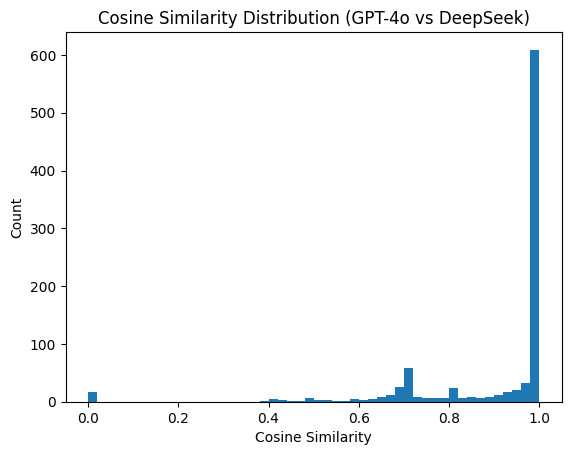

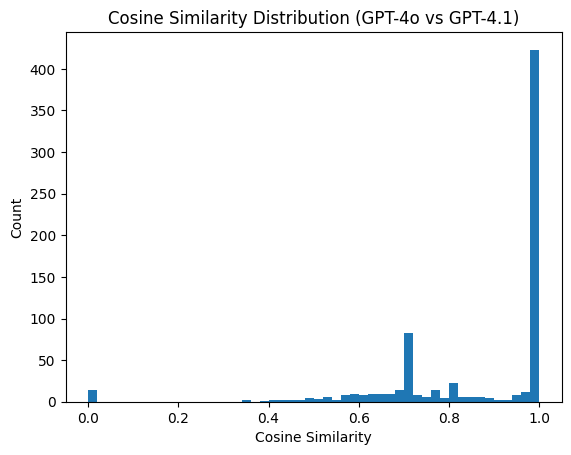

In [ ]:
gpt_deepseek_cosines = validation_data_gpt_and_deepseek[
    "gpt_deepseek_cosine_similarity"
].dropna()
plt.hist(gpt_deepseek_cosines, bins=50)
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.title("Cosine Similarity Distribution (GPT-4o vs DeepSeek)")
plt.show()

gpt_gpt41_cosines = validation_data_gpt_and_gpt41[
    "gpt_gpt41_cosine_similarity"
].dropna()
plt.hist(gpt_gpt41_cosines, bins=50)
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.title("Cosine Similarity Distribution (GPT-4o vs GPT-4.1)")
plt.show()

In [15]:
validation_data_gpt_and_deepseek

,synonyms,manual_classification,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_deepseek-v3,chemsource_output_gpt-4o_classification,chemsource_output_gpt-4o_classprobs,chemsource_output_deepseek-v3_classification,chemsource_output_deepseek-v3_classprobs,cleaned_manual,cleaned_gpt4o,cleaned_deepseekv3
0,('(s)-2-(6-(4-chlorophenyl)-8-methoxy-1-methyl...,Medical,The bromodomain and extraterminal (BET) prote...,I-bet762,PUBMED,"(MEDICAL, [(MED, -7.941850526549388e-06), (ICA...","(MEDICAL, [(MED, -0.03046262077987194), (ICAL,...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999985694905718},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999985694905718, 'INDUSTRIAL': ..."
1,"('Molibresib', 'I-bet762', 'I-bet-762', 'I-bet...",Medical,"Molibresib is a selective, small molecule inh...",Molibresib,PUBMED,"(MEDICAL, [(MED, -3.128163257315464e-07), (ICA...","(MEDICAL, [(MED, -0.00010644822759786621), (IC...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999969005680498},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999969005680498, 'INDUSTRIAL': ..."
2,"('Elenbecestat', 'N-[3-[(4as,5r,7as)-2-amino-5...",Medical,Many factors contribute to inadequate diversi...,Elenbecestat,PUBMED,"(MEDICAL, [(MED, -1.6240566083070007e-06), (IC...","(MEDICAL, [(MED, -0.006801193580031395), (ICAL...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999995231630692},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999995231630692, 'INDUSTRIAL': ..."
3,"('Dianhydrodulcitol', 'Dianhydrogalactitol', '...",Medical,The effect of dianhydrodulcithol (DAD) admini...,Dianhydrodulcitol,PUBMED,"(MEDICAL, [(MED, -0.10020806640386581), (ICAL,...","(MEDICAL, [(MED, -0.050965193659067154), (ICAL...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.999995112442896},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.999995112442896, 'INDUSTRIAL': 0..."
4,"('Erlotinib', 'N-(3-ethynylphenyl)-6,7-bis(2-m...",Medical,"Erlotinib, sold under the brand name Tarceva a...",Erlotinib,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -7.510157047363464e-06), (ICA...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999998807907247},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999998807907247, 'INDUSTRIAL': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,"('Telenzepine', 'Telenzepine hydrochloride', '...",Medical,Telenzepine is a thienobenzodiazepine acting a...,Telenzepine,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])","(MEDICAL, [(MED, -0.00023600654094479978), (IC...",[MEDICAL],{'MEDICAL': 1.0},[MEDICAL],{'MEDICAL': 0.9999990463265931},"{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 1.0, 'INDUSTRIAL': 0.0, 'ENDOGENOU...","{'MEDICAL': 0.9999990463265931, 'INDUSTRIAL': ..."
4949,"('Gal', 'Galactopyranose', 'Galactopyranoside'...","Endogenous, Medical","Galactose (, galacto- + -ose, ""milk sugar""), s...",Galactose,WIKIPEDIA,"(ENDOGENOUS, FOOD, [(END, -0.12725649774074554...","(FOOD, ENDOGENOUS, [(FO, -0.06912534683942795)...","[ENDOGENOUS, FOOD]","{'ENDOGENOUS': 0.8805069951340568, 'FOOD': 1.0}","[FOOD, ENDOGENOUS]","{'FOOD': 0.9332096978605292, 'ENDOGENOUS': 0.9...","{'ENDOGENOUS': 1.0, 'MEDICAL': 1.0, 'INDUSTRIA...","{'ENDOGENOUS': 0.8805069951340568, 'FOOD': 1.0...","{'FOOD': 0.9332096978605292, 'ENDOGENOUS': 0.9..."
4950,"('Mephedrone', 'Meow meow', 'M-cat', 'Bubbles'...",Medical,"Mephedrone, also known as 4-methylmethcathinon...",Mephedrone,WIKIPEDIA,"(INDUSTRIAL, [(IND, -0.25217655301094055), (U,...","(INDUSTRIAL, MEDICAL, [(IN, -0.056836303323507...",[INDUSTRIAL],{'INDUSTRIAL': 1.0},"[INDUSTRIAL, MEDICAL]","{'INDUSTRIAL': 0.94474566

In [ ]:
validation_upset_gpt4o_classified = validation_upset_gpt4o[
    validation_upset_gpt4o["INFO"] == 0
]
validation_upset_gpt4o_classified = validation_upset_gpt4o_classified.drop(
    columns=["INFO"]
)[["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE"]]
validation_upset_gpt4o_classified["summed_probs"] = (
    validation_upset_gpt4o_classified.sum(axis=1)
)
validation_upset_gpt4o_classified = validation_upset_gpt4o_classified[
    validation_upset_gpt4o_classified["summed_probs"] > 0
]
validation_upset_gpt4o_classified = validation_upset_gpt4o_classified.drop(
    columns=["summed_probs"]
)
validation_upset_gpt4o_classified_thresh = validation_upset_gpt4o_classified.applymap(
    lambda x: True if x > 0.5 else False
)

validation_upset_deepseekv3_classified = validation_upset_deepseekv3[
    validation_upset_deepseekv3["INFO"] == 0
]
validation_upset_deepseekv3_classified = validation_upset_deepseekv3_classified.drop(
    columns=["INFO"]
)[["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE"]]
validation_upset_deepseekv3_classified["summed_probs"] = (
    validation_upset_deepseekv3_classified.sum(axis=1)
)
validation_upset_deepseekv3_classified = validation_upset_deepseekv3_classified[
    validation_upset_deepseekv3_classified["summed_probs"] > 0
]
validation_upset_deepseekv3_classified = validation_upset_deepseekv3_classified.drop(
    columns=["summed_probs"]
)
validation_upset_deepseekv3_classified_thresh = (
    validation_upset_deepseekv3_classified.applymap(
        lambda x: True if x > 0.5 else False
    ).astype(bool)
)

/tmp/ipykernel_36266/647987716.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  validation_upset_gpt4o_classified_thresh = validation_upset_gpt4o_classified.applymap(lambda x: True if x > 0.5 else False)
/tmp/ipykernel_36266/647987716.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  validation_upset_deepseekv3_classified_thresh = validation_upset_deepseekv3_classified.applymap(lambda x: True if x > 0.5 else False).astype(bool)


/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

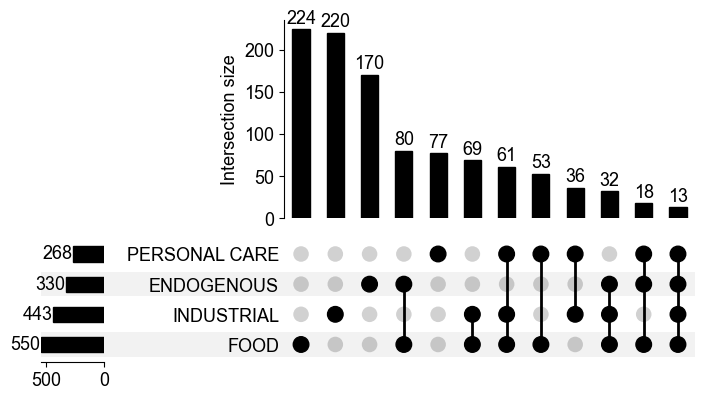

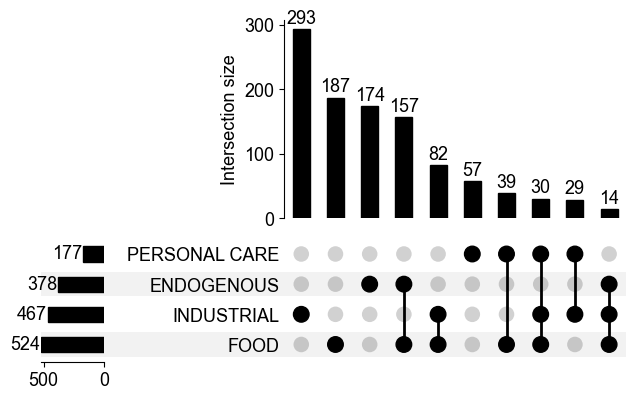

In [ ]:
plt.rcParams.update({"font.size": 13})
plt.rcParams["font.family"] = ["Arial", "sans-serif"]
fig = plot(
    from_indicators(validation_upset_gpt4o_classified_thresh),
    subset_size="count",
    show_counts=True,
    min_subset_size="1%",
    sort_by="cardinality",
)
ax = fig["intersections"]
ax.grid(False, axis="y")
ax2 = fig["totals"]
ax2.xaxis.grid(False)

plt.rcParams.update({"font.size": 13})
plt.rcParams["font.family"] = ["Arial", "sans-serif"]
fig = plot(
    from_indicators(validation_upset_deepseekv3_classified_thresh),
    subset_size="count",
    show_counts=True,
    min_subset_size="1%",
    sort_by="cardinality",
)
ax = fig["intersections"]
ax.grid(False, axis="y")
ax2 = fig["totals"]
ax2.xaxis.grid(False)

In [ ]:
validation_all = validation_upset_gpt4o_classified_thresh.rename(
    columns={
        "INDUSTRIAL": "INDUSTRIAL_gpt4o",
        "ENDOGENOUS": "ENDOGENOUS_gpt4o",
        "FOOD": "FOOD_gpt4o",
        "PERSONAL CARE": "PERSONAL CARE_gpt4o",
    }
)
validation_all = validation_all.join(
    validation_upset_deepseekv3_classified_thresh.rename(
        columns={
            "INDUSTRIAL": "INDUSTRIAL_deepseekv3",
            "ENDOGENOUS": "ENDOGENOUS_deepseekv3",
            "FOOD": "FOOD_deepseekv3",
            "PERSONAL CARE": "PERSONAL CARE_deepseekv3",
        }
    )
)
validation_all = validation_all.dropna()
validation_all = validation_all.astype(bool)

mask = (
    (validation_all["FOOD_gpt4o"])
    & (validation_all["INDUSTRIAL_deepseekv3"])
    & ~(validation_all["FOOD_deepseekv3"])
)

filtered_indices = validation_all[mask].index
filtered_validation_data = validation_data.loc[filtered_indices]
filtered_validation_data.to_csv(
    "../data/output/gpt_food_deepseek_industrial_not_deepseek_food.csv", index=False
)

Additional Datasets

In [ ]:
additional_data = pd.read_csv("../data/output/all_data_classified_gpt-4o.tsv", sep="\t")
additional_data["chemsource_output_gpt-4o"] = additional_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: literal_eval(x))
additional_data["chemsource_output_gpt-4o_classification"] = additional_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: x[0])
additional_data["chemsource_output_gpt-4o_classprobs"] = additional_data[
    "chemsource_output_gpt-4o"
].apply(lambda x: evaluate_probs(x[1]))
additional_upset = cs_output_to_upset_probs(
    additional_data,
    "chemsource_output_gpt-4o_classification",
    "chemsource_output_gpt-4o_classprobs",
)


additional_upset_classified = additional_upset[additional_upset["INFO"] == 0]
additional_upset_classified = additional_upset_classified.drop(columns=["INFO"])[
    ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL", "dataset"]
]
additional_upset_classified_groups = additional_upset_classified.groupby("dataset")

thresholded_groups = {}
for name, group in additional_upset_classified_groups:
    group = group.drop(columns=["dataset"])
    group["summed_probs"] = group.sum(axis=1)
    group = group[group["summed_probs"] > 0]
    group = group.drop(columns=["summed_probs"])
    group_thresh = group.applymap(lambda x: True if x > 0.5 else False)
    thresholded_groups[name] = group_thresh

# validation_upset_gpt4o_classified["summed_probs"] = validation_upset_gpt4o_classified.sum(axis=1)
# validation_upset_gpt4o_classified = validation_upset_gpt4o_classified[validation_upset_gpt4o_classified["summed_probs"] > 0]
# validation_upset_gpt4o_classified = validation_upset_gpt4o_classified.drop(columns=["summed_probs"])
# validation_upset_gpt4o_classified_thresh = validation_upset_gpt4o_classified.applymap(lambda x: True if x > 0.5 else False)

/home/prajitrr/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)
/tmp/ipykernel_1008515/854724710.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_thresh = group.applymap(lambda x: True if x > 0.5 else False)
/tmp/ipykernel_1008515/854724710.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_thresh = group.applymap(lambda x: True if x > 0.5 else False)
/tmp/ipykernel_1008515/854724710.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_thresh = group.applymap(lambda x: True if x > 0.5 else False)
/tmp/ipykernel_1008515/85

/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

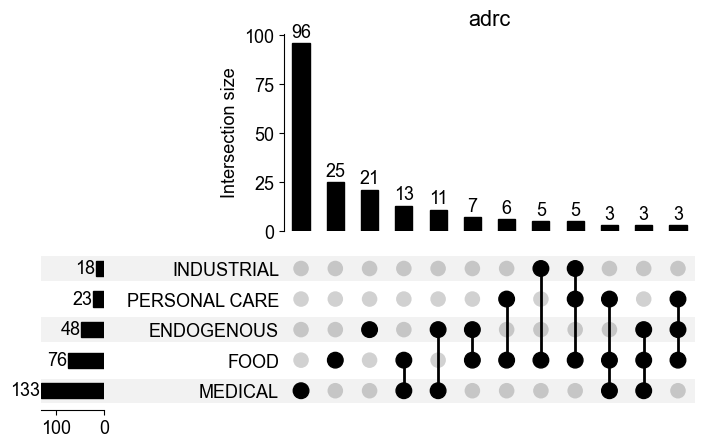

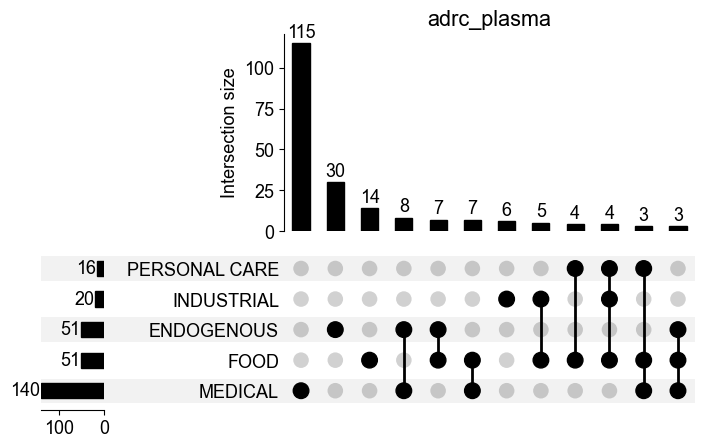

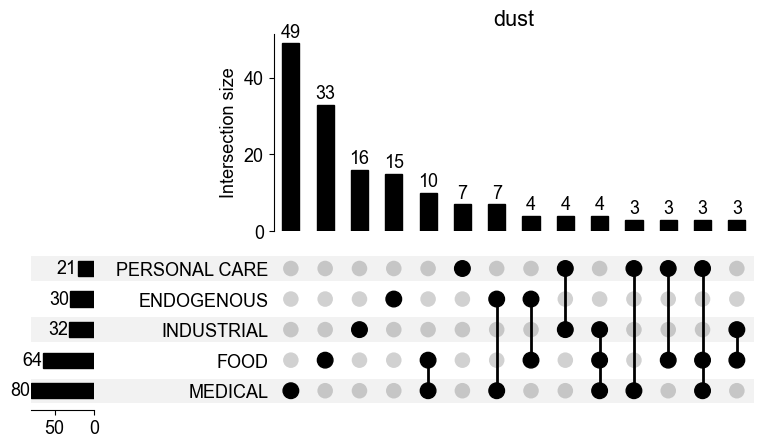

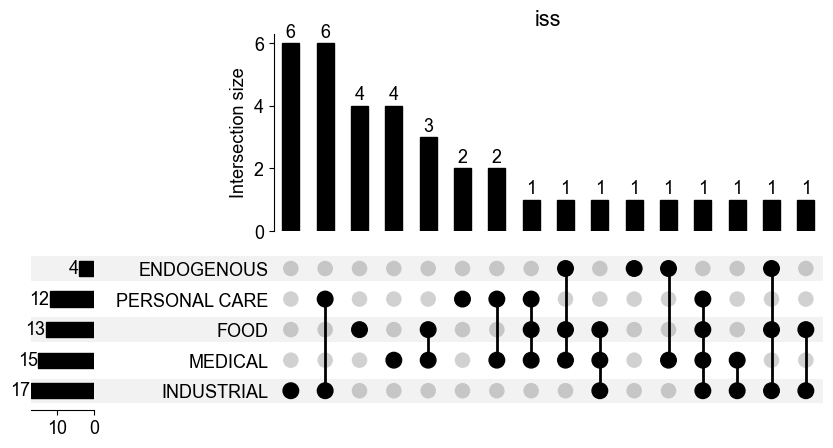

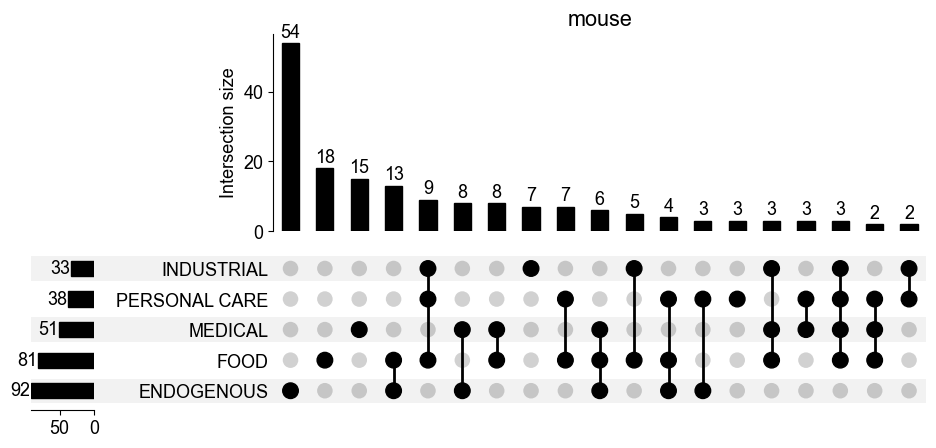

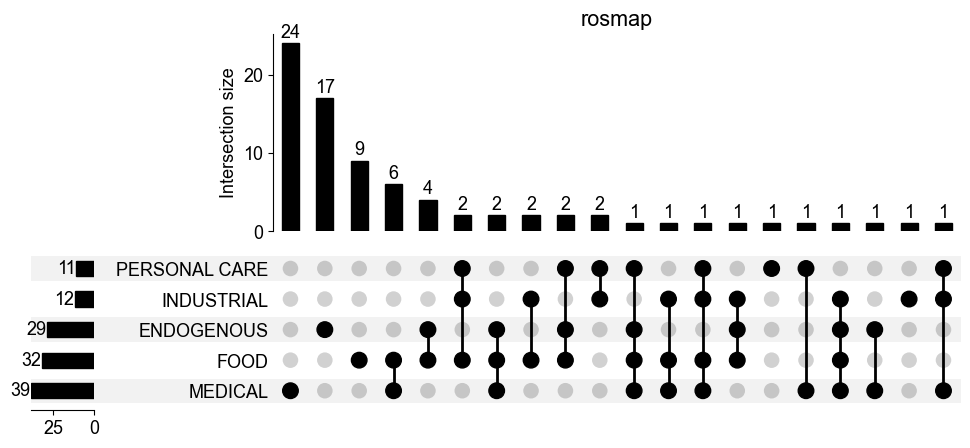

In [ ]:
for name, group in thresholded_groups.items():
    plt.rcParams.update({"font.size": 13})
    plt.rcParams["font.family"] = ["Arial", "sans-serif"]
    fig = plot(
        from_indicators(group),
        subset_size="count",
        show_counts=True,
        min_subset_size="1%",
        sort_by="cardinality",
    )
    ax = fig["intersections"]
    ax.grid(False, axis="y")
    ax2 = fig["totals"]
    ax2.xaxis.grid(False)
    plt.title(name)

In [ ]:
additional_upset[
    (additional_upset["dataset"] == "mouse")
    & (additional_upset["MEDICAL"] >= 0.5)
    & (additional_upset["FOOD"] < 0.5)
    & (additional_upset["ENDOGENOUS"] < 0.5)
    & (additional_upset["INDUSTRIAL"] < 0.5)
    & (additional_upset["PERSONAL CARE"] < 0.5)
]

,X.Scan.,synonyms,dataset,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_gpt-4o_classification,chemsource_output_gpt-4o_classprobs,ENDOGENOUS,FOOD,INDUSTRIAL,INFO,MEDICAL,PERSONAL CARE
52,3356.0,"('O-acetylcarnitinium', 'O-acetyl-l-carnitine ...",mouse,To assess the efficacy and tolerability of ac...,Levacecarnine,PUBMED,"(MEDICAL, [(MED, -2.339278580620885e-06), (ICA...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
72,43458.0,"('N-acetyl-dl-tryptophan', 'N-acetyltryptophan...",mouse,Chromatographic procedures have been develope...,N-acetyl-dl-tryptophan,PUBMED,"(MEDICAL, [(MED, -0.00044092073221690953), (IC...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
80,62040.0,"('Nortriptyline', 'Aventyl', 'Desitriptilina',...",mouse,"Nortriptyline, sold under the brand name Avent...",Nortriptyline,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
82,74669.0,"('Tamoxifen', 'Trans-tamoxifen', 'Crisafeno', ...",mouse,"Tamoxifen, sold under the brand name Nolvadex ...",Tamoxifen,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
84,33960.0,"('N-acetyl-l-leucine', 'Acetyl-l-leucine', 'Ac...",mouse,Niemann-Pick disease type C is a rare lysosom...,N-acetyl-l-leucine,PUBMED,"(MEDICAL, [(MED, -9.088346359931165e-07), (ICA...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
97,77097.0,"('N-hexadecylphosphonocholine', 'Ncimech_00060...",mouse,"Miltefosine, sold under the trade name Impavid...",Miltefosine,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
99,38931.0,"('Riboprine', 'Isopentenyladenosine', 'Isopent...",mouse,"Lately, nucleos(t)ide antivirals topped the s...",Riboprine,PUBMED,"(MEDICAL, [(MED, -7.493430894101039e-05), (ICA...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
105,39547.0,"('N-acetyl-l-cysteine', 'Acetylcysteine', 'N-a...",mouse,N-acetyl-L-cysteine (NAC) is a compound of in...,N-acetyl-l-cysteine,PUBMED,"(MEDICAL, [(MED, -7.941850526549388e-06), (ICA...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
114,2107.0,"('Metformin', 'N,n-dimethylimidodicarbonimidic...",mouse,"Metformin, sold under the brand name Glucophag...",Metformin,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0
130,2644.0,"('Galnac', 'N-acetyl-d-galactosamine', 'N-acet...",mouse,Small interfering RNAs (siRNAs) represent a n...,Galnac,PUBMED,"(MEDICAL, [(MED, -0.03248050808906555), (ICAL,...",[MEDICAL],{'MEDICAL': 1.0},0.000000,0.0,0.0,0.0,1.0,0.0


Reanalysis of Mice Dataset

In [ ]:
mice_data = pd.read_csv(
    "../data/output/mice_data_classified_gpt-4o_contextual.tsv", sep="\t"
)

mice_data["chemsource_output_gpt-4o_contextual"] = mice_data[
    "chemsource_output_gpt-4o_contextual"
].apply(lambda x: literal_eval(x))
mice_data["chemsource_output_gpt-4o_classification"] = mice_data[
    "chemsource_output_gpt-4o_contextual"
].apply(lambda x: x[0])
mice_data["chemsource_output_gpt-4o_classprobs"] = mice_data[
    "chemsource_output_gpt-4o_contextual"
].apply(lambda x: evaluate_probs(x[1]))
mice_data_upset = cs_output_to_upset_probs(
    mice_data,
    "chemsource_output_gpt-4o_classification",
    "chemsource_output_gpt-4o_classprobs",
)

mice_data_upset_classified = mice_data_upset[mice_data_upset["INFO"] == 0]
mice_data_upset_classified = mice_data_upset_classified.drop(columns=["INFO"])[
    ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]
]
mice_data_upset_classified["summed_probs"] = mice_data_upset_classified.sum(axis=1)
mice_data_upset_classified = mice_data_upset_classified[
    mice_data_upset_classified["summed_probs"] > 0
]
mice_data_upset_classified = mice_data_upset_classified.drop(columns=["summed_probs"])
mice_data_upset_classified_thresh = mice_data_upset_classified.applymap(
    lambda x: True if x > 0.5 else False
).astype(bool)

/home/prajitrr/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)
/tmp/ipykernel_1008515/3727957643.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mice_data_upset_classified_thresh = mice_data_upset_classified.applymap(lambda x: True if x > 0.5 else False).astype(bool)


/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

Text(0.5, 1.0, 'Mouse Dataset with Contextual Information')

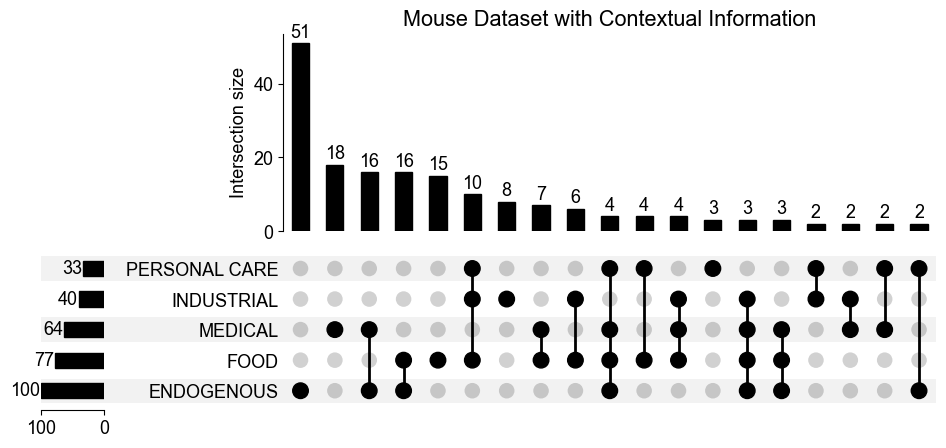

In [ ]:
plt.rcParams.update({"font.size": 13})
plt.rcParams["font.family"] = ["Arial", "sans-serif"]
fig = plot(
    from_indicators(mice_data_upset_classified_thresh),
    subset_size="count",
    show_counts=True,
    min_subset_size="1%",
    sort_by="cardinality",
)
ax = fig["intersections"]
ax.grid(False, axis="y")
ax2 = fig["totals"]
ax2.xaxis.grid(False)
plt.title("Mouse Dataset with Contextual Information")

Detection Frequencies + Food & Personal Care Datasets

In [ ]:
detection_frequencies = pd.read_csv(
    "../data/cleaned_data/all_cleaned_data_frequencies.tsv", sep="\t"
)
food_personal_care = pd.read_csv(
    "../data/output/extra_controls_classified_gpt-4o.tsv", sep="\t"
)

food_personal_care["chemsource_output_gpt-4o"] = food_personal_care[
    "chemsource_output"
].apply(lambda x: literal_eval(x))
food_personal_care.drop(columns=["chemsource_output"], inplace=True)
food_personal_care.rename(columns={"featureID": "X.Scan."}, inplace=True)
food_personal_care["chemsource_output_gpt-4o_classification"] = food_personal_care[
    "chemsource_output_gpt-4o"
].apply(lambda x: x[0])
food_personal_care["chemsource_output_gpt-4o_classprobs"] = food_personal_care[
    "chemsource_output_gpt-4o"
].apply(lambda x: evaluate_probs(x[1]))

In [ ]:
all_additional_data = pd.concat(
    [additional_data, food_personal_care], ignore_index=True
)
all_additional_data_no_rosmap = all_additional_data[
    ~all_additional_data["dataset"].isin(["rosmap"])
]

In [ ]:
detection_frequencies_no_na = detection_frequencies.dropna(subset=["featureID", "DF"])
detection_frequencies_no_na = detection_frequencies_no_na.drop_duplicates(
    subset=["featureID", "DF"]
)

In [ ]:
all_additional_data_no_rosmap["detection_mapper"] = all_additional_data_no_rosmap.apply(
    lambda x: x["dataset"] + "_" + str(int(x["X.Scan."])), axis=1
)
detection_frequencies_no_na["detection_mapper"] = detection_frequencies_no_na.apply(
    lambda x: x["dataset"] + "_" + str(int(x["featureID"])), axis=1
)
all_additional_data_no_rosmap = all_additional_data_no_rosmap.merge(
    detection_frequencies_no_na[["detection_mapper", "DF"]],
    on="detection_mapper",
    how="left",
)

/tmp/ipykernel_1008515/251924154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_additional_data_no_rosmap["detection_mapper"] = all_additional_data_no_rosmap.apply(lambda x : x["dataset"] + "_" + str(int(x["X.Scan."])), axis=1)


In [ ]:
all_additional_data_no_rosmap["DF_x"] = all_additional_data_no_rosmap["DF_x"].fillna(0)
all_additional_data_no_rosmap["DF_y"] = all_additional_data_no_rosmap["DF_y"].fillna(0)
all_additional_data_no_rosmap["DF"] = all_additional_data_no_rosmap[
    ["DF_x", "DF_y"]
].max(axis=1)
all_additional_data_no_rosmap.drop(columns=["DF_x", "DF_y"], inplace=True)

In [ ]:
rosmap_only = all_additional_data[all_additional_data["dataset"] == "rosmap"]
rosmap_only.drop(columns=["dataset"], inplace=True)
detection_frequencies_rosmap = detection_frequencies[
    detection_frequencies["dataset"] == "rosmap"
]
rosmap_only["synonyms_lower"] = rosmap_only["synonyms"].apply(
    lambda x: [i.lower() for i in literal_eval(x)]
)
detection_frequencies_rosmap.dropna(subset=["DF"], inplace=True)
detection_frequencies_rosmap.drop_duplicates(subset=["featureID", "DF"], inplace=True)
detection_frequencies_rosmap["name_lower"] = detection_frequencies_rosmap[
    "Compound_Name"
].apply(lambda x: x.lower())

# If an item in rosmap_only["synonyms_lower"] is in detection_frequencies_rosmap["name_lower"], then add the detection frequency to the corresponding item in the defaultdict

for index, item in rosmap_only.iterrows():
    for synonym in item["synonyms_lower"]:
        for df_item in detection_frequencies_rosmap["name_lower"]:
            if synonym in df_item:
                detection_frequency = detection_frequencies_rosmap[
                    detection_frequencies_rosmap["name_lower"] == df_item
                ]["DF"].values[0]
                rosmap_only.at[index, "DF"] = detection_frequency

/tmp/ipykernel_1008515/1341727490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rosmap_only.drop(columns=["dataset"], inplace=True)
/tmp/ipykernel_1008515/1341727490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rosmap_only["synonyms_lower"] = rosmap_only["synonyms"].apply(lambda x: [i.lower() for i in literal_eval(x)])
/tmp/ipykernel_1008515/1341727490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
# Remaining frequencies (manually extracted):
remaining_frequencies = {
    "N-acetyl-l-methionine": 0.951582867783985,
    "Phenylacetylglutamine": 0.361266294227188,
    "Pc(18:1(9z)/14:0)": 0.0,
    "Popc": 0.0,
    "Antiarol": 0.0,
    "Cocamidopropyl betaine": 0.0167597765363128,
    "Tyrosine, 3-methoxy-": 0.251396648044693,
    "Erucamide": 0.156424581005587,
    "Levacecarnine": 0.64804469273743,
    "Oleoyl-l-carnitine": 0.534450651769088,
    "Cerebrosterol": 0.642458100558659,
    "Ncistruc1_000126": 0.94413407821229,
    "Tryptophylglycine": 0.210428305400372,
    "Pe(18:1(9z)/0:0)": 0.0,
    "Oxiglutatione": 0.0279329608938547,
    "Lysophosphatidylethanolamine(16:0)": 0.0,
    "Omega-3 arachidonic acid ethyl ester": 0.126629422718808,
    "Levoglucosan": 0.00558659217877095,
    "(9z,11e)-13-oxooctadeca-9,11-dienoic acid": 0.0,
    "Coronaric acid": 0.0,
}

# Fill in "DF" in rosmap_only by column "Compound_Name" using remaining_frequencies
rosmap_only["DF"] = rosmap_only.apply(
    lambda x: remaining_frequencies[x["name_used"]]
    if (x["name_used"] in remaining_frequencies.keys())
    else x["DF"],
    axis=1,
)

/tmp/ipykernel_1008515/1966637166.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rosmap_only["DF"] = rosmap_only.apply(lambda x: remaining_frequencies[x["name_used"]] if (x["name_used"] in remaining_frequencies.keys()) else x["DF"], axis=1)


In [29]:
all_additional_groups_no_rosmap = all_additional_data_no_rosmap.groupby("dataset")

all_groups_no_rosmap = {}
for name, group in all_additional_groups_no_rosmap:
    group = group.drop(columns=["dataset"])
    all_groups_no_rosmap[name] = group

all_groups = all_groups_no_rosmap.copy()
all_groups["rosmap"] = rosmap_only

In [ ]:
# Convert dict of dataframes back to single df
all_groups_copy = all_groups.copy()

all_groups_dataframe = pd.DataFrame()

for group in all_groups_copy.keys():
    all_groups_copy[group]["dataset"] = group
    all_groups_dataframe = pd.concat(
        [all_groups_dataframe, all_groups_copy[group]], ignore_index=True
    )

/tmp/ipykernel_1008515/3581416190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_groups_copy[group]["dataset"] = group


In [31]:
all_groups_dataframe.drop(columns=["detection_mapper"], inplace=True)

In [32]:
all_groups_dataframe.to_csv("../data/output/all_additional_datasets.csv", index=False)

Plot without wiping additional categories

In [ ]:
categories = ["FOOD", "ENDOGENOUS", "INDUSTRIAL", "PERSONAL CARE", "MEDICAL"]
datasets = list(all_groups.keys())

dataset_dict = {}
for dataset in datasets:
    # dict of empty lists
    dataset_dict[dataset] = {category: [] for category in categories}
    for i, row in all_groups[dataset].iterrows():
        # if row["DF"] < 0.05:
        #     continue
        has_food = False
        has_endogenous = False
        total_sum = sum(row["chemsource_output_gpt-4o_classprobs"].values())

        for category in categories:
            # if  category == "FOOD":
            #     try:
            #         probability = row["chemsource_output_gpt-4o_classprobs"][category]
            #         if probability > 0.5:
            #             has_food = True
            #     except:
            #         pass
            # if  category == "ENDOGENOUS":
            #     try:
            #         probability = row["chemsource_output_gpt-4o_classprobs"][category]
            #         if probability > 0.5:
            #             has_endogenous = True
            #     except:
            #         pass
            # if (category == "PERSONAL CARE" or category == "MEDICAL" )and (has_food or has_endogenous):
            #     continue
            try:
                net_val = (
                    row["chemsource_output_gpt-4o_classprobs"][category] * row["DF"]
                )
                if net_val > 0:
                    dataset_dict[dataset][category].append(net_val)
                else:
                    pass
            except KeyError:
                pass

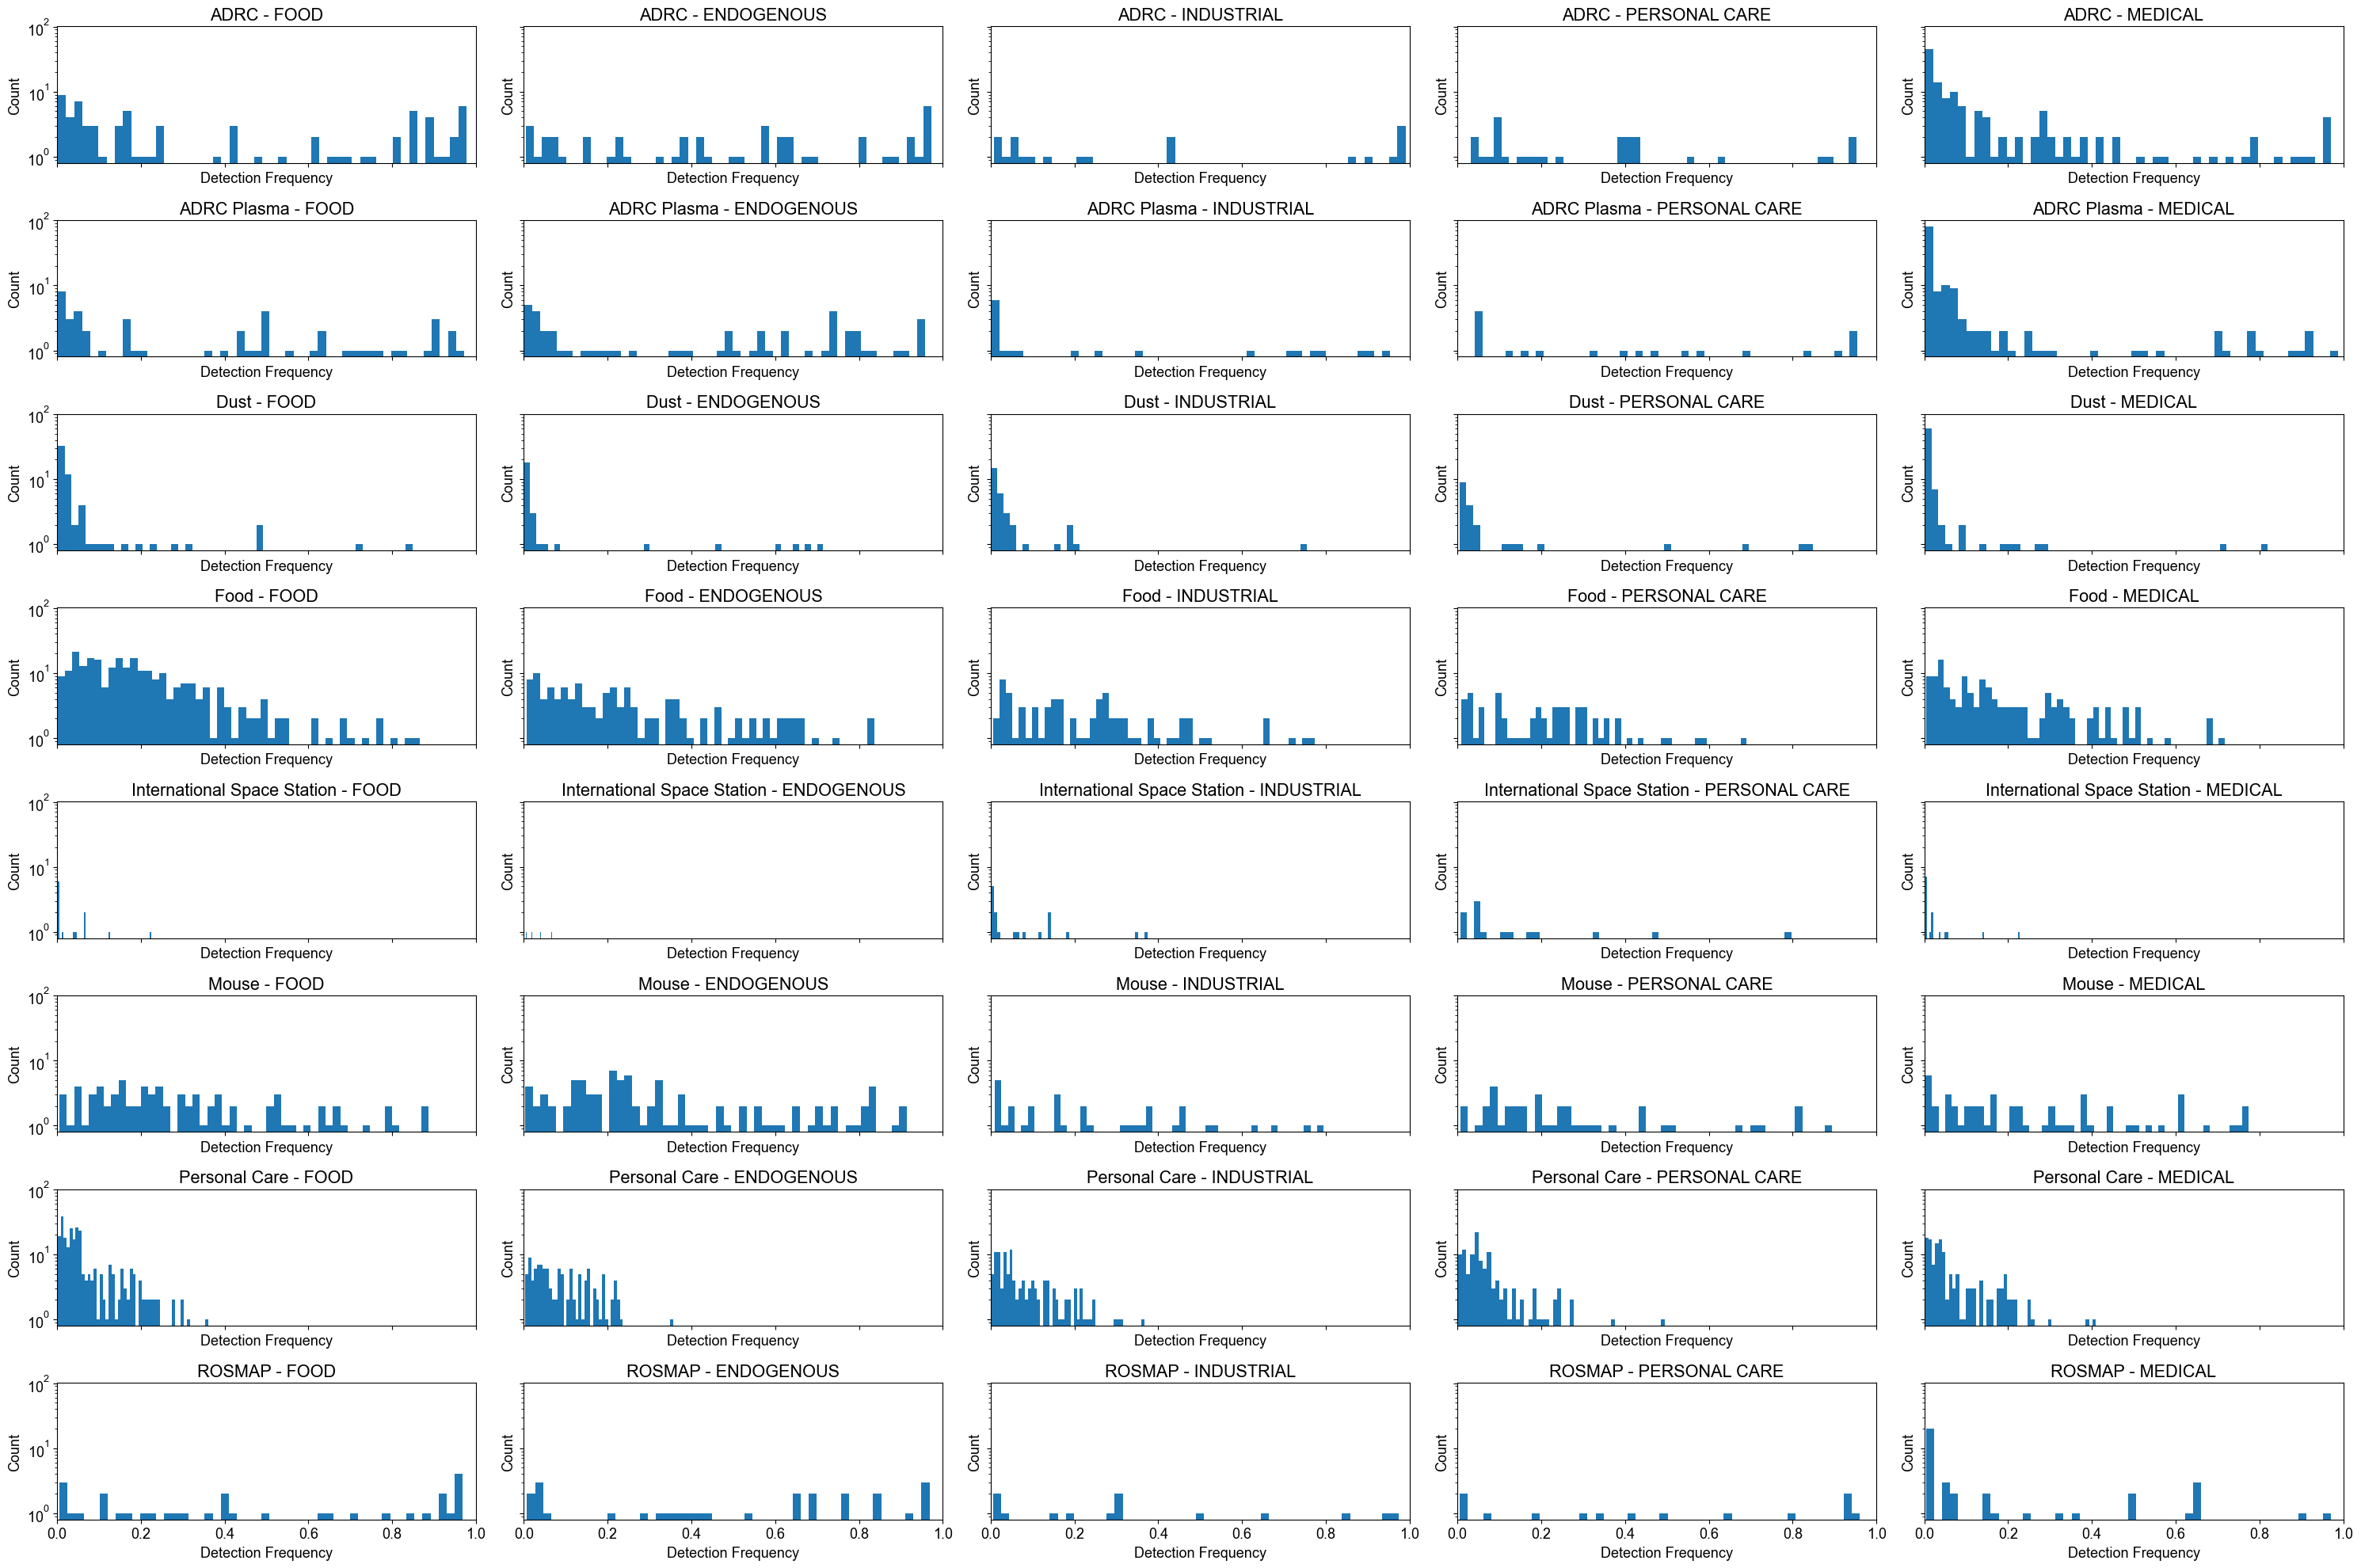

In [ ]:
# Create plots for each dataset with subplots for each category
fig, axs = plt.subplots(
    len(datasets), len(categories), figsize=(30, 20), sharex=True, sharey=True
)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.flatten()

dataset_names_list = [
    "ADRC",
    "ADRC Plasma",
    "Dust",
    "Food",
    "International Space Station",
    "Mouse",
    "Personal Care",
    "ROSMAP",
]

for i, dataset in enumerate(datasets):
    for j, category in enumerate(categories):
        hist_list = dataset_dict[dataset][category]
        hist_list = [x for x in hist_list if x > 0]
        axs[i * len(categories) + j].hist(hist_list, bins=50)
        axs[i * len(categories) + j].set_title(f"{dataset_names_list[i]} - {category}")
        axs[i * len(categories) + j].set_xlabel("Detection Frequency")
        axs[i * len(categories) + j].set_ylabel("Count")
        axs[i * len(categories) + j].grid(False)
        axs[i * len(categories) + j].set_xlim(0, 1)
        # Set logscale
        axs[i * len(categories) + j].set_yscale("log")
        # axs[i * len(categories) + j].set_ylim(0, 2 * len(dataset_dict[dataset][category]))
plt.tight_layout()
plt.show()

In [ ]:
dataset_dict_summed = {}
for dataset in datasets:
    dataset_dict_summed[dataset] = {}
    for category in categories:
        dataset_dict_summed[dataset][category] = sum(dataset_dict[dataset][category])

# Normalize the values
for dataset in datasets:
    total_sum = sum(dataset_dict_summed[dataset].values())
    for category in categories:
        dataset_dict_summed[dataset][category] = dataset_dict_summed[dataset][
            category
        ] / (total_sum + 0.0000001)

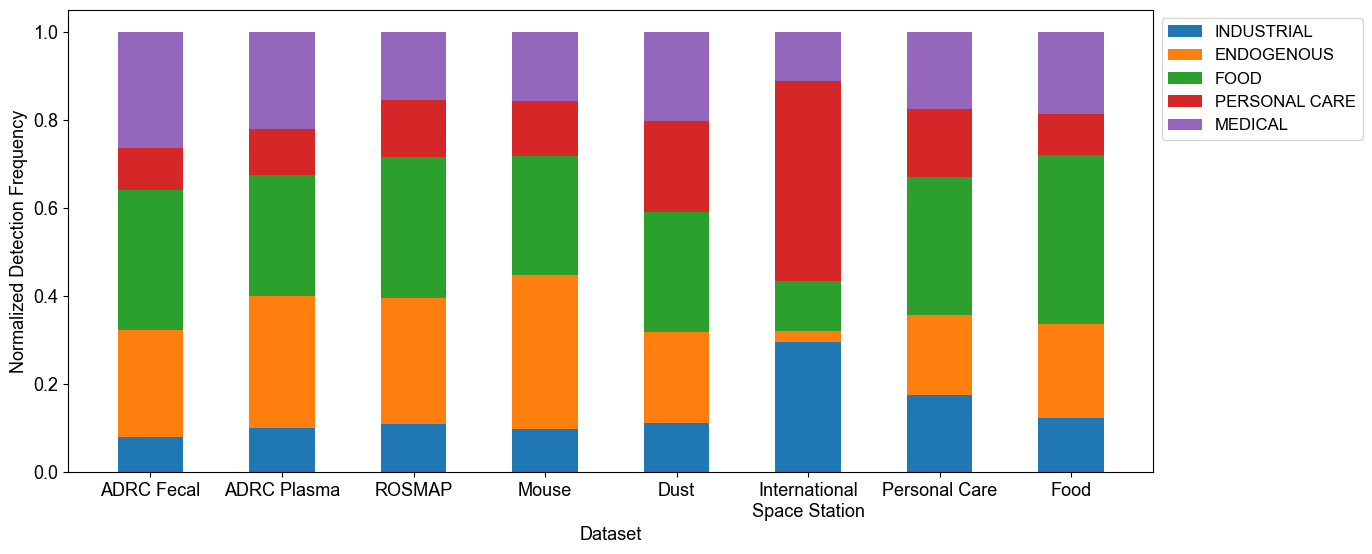

In [ ]:
# Make a stacked bar plot
dataset_names_reordered = (
    "ADRC Fecal",
    "ADRC Plasma",
    "ROSMAP",
    "Mouse",
    "Dust",
    "International\nSpace Station",
    "Personal Care",
    "Food",
)
datasets_reordered = [
    "adrc",
    "adrc_plasma",
    "rosmap",
    "mouse",
    "dust",
    "iss",
    "personal",
    "food",
]
# Make a list of the default colors, blue orange green red purple
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Create a color map for the categories
color_map = {
    "FOOD": colors[2],
    "ENDOGENOUS": colors[1],
    "INDUSTRIAL": colors[0],
    "PERSONAL CARE": colors[3],
    "MEDICAL": colors[4],
}
categories_reordered = ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]

weight_counts = {}
for category in categories_reordered:
    weight_counts[category] = []
    for dataset in datasets_reordered:
        weight_counts[category].append(dataset_dict_summed[dataset][category])
    weight_counts[category] = np.array(weight_counts[category])

width = 0.5
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(datasets))
for category in categories_reordered:
    ax.bar(
        dataset_names_reordered,
        weight_counts[category],
        width,
        label=category,
        bottom=bottom,
        color=color_map[category],
    )
    bottom += weight_counts[category]

ax.set_ylabel("Normalized Detection Frequency")
ax.set_xlabel("Dataset")

# Keep the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

Plot with wiping additional categories

In [ ]:
categories = ["FOOD", "ENDOGENOUS", "INDUSTRIAL", "PERSONAL CARE", "MEDICAL"]
datasets = list(all_groups.keys())

dataset_dict_wiped = {}
for dataset in datasets:
    # dict of empty lists
    dataset_dict_wiped[dataset] = {category: [] for category in categories}
    for i, row in all_groups[dataset].iterrows():
        # if row["DF"] < 0.05:
        #     continue
        has_food = False
        has_endogenous = False
        has_industrial = False
        has_personal = False
        temp_categories = categories
        if (
            dataset == "adrc"
            or dataset == "adrc_plasma"
            or dataset == "rosmap"
            or dataset == "mouse"
        ):
            try:
                endogenous_probability = row["chemsource_output_gpt-4o_classprobs"][
                    "ENDOGENOUS"
                ]
                if endogenous_probability > 0.5:
                    temp_categories = ["ENDOGENOUS", "FOOD"]
            except:
                pass

            try:
                food_probability = row["chemsource_output_gpt-4o_classprobs"]["FOOD"]
                if food_probability > 0.5:
                    temp_categories = ["ENDOGENOUS", "FOOD"]
            except:
                pass

        if dataset == "food":
            try:
                food_probability = row["chemsource_output_gpt-4o_classprobs"]["FOOD"]
                if food_probability > 0.5:
                    temp_categories = ["FOOD"]
            except:
                pass

        if dataset == "personal":
            try:
                personal_probability = row["chemsource_output_gpt-4o_classprobs"][
                    "PERSONAL CARE"
                ]
                if personal_probability > 0.5:
                    temp_categories = ["PERSONAL CARE", "INDUSTRIAL"]
            except:
                pass

            try:
                industrial_probability = row["chemsource_output_gpt-4o_classprobs"][
                    "INDUSTRIAL"
                ]
                if industrial_probability > 0.5:
                    temp_categories = ["PERSONAL CARE", "INDUSTRIAL"]
            except:
                pass

        if dataset == "iss":
            try:
                industrial_probability = row["chemsource_output_gpt-4o_classprobs"][
                    "INDUSTRIAL"
                ]
                if industrial_probability > 0.5:
                    temp_categories = ["INDUSTRIAL"]
            except:
                pass

        for category in temp_categories:
            try:
                net_val = (
                    row["chemsource_output_gpt-4o_classprobs"][category] * row["DF"]
                )
                if net_val > 0:
                    dataset_dict_wiped[dataset][category].append(net_val)
                else:
                    pass
            except KeyError:
                pass

In [ ]:
dataset_dict_summed_wiped = {}
for dataset in datasets:
    dataset_dict_summed_wiped[dataset] = {}
    for category in categories:
        dataset_dict_summed_wiped[dataset][category] = sum(
            dataset_dict_wiped[dataset][category]
        )

# Normalize the values
for dataset in datasets:
    total_sum = sum(dataset_dict_summed_wiped[dataset].values())
    for category in categories:
        dataset_dict_summed_wiped[dataset][category] = (
            dataset_dict_summed_wiped[dataset][category] / total_sum
        )

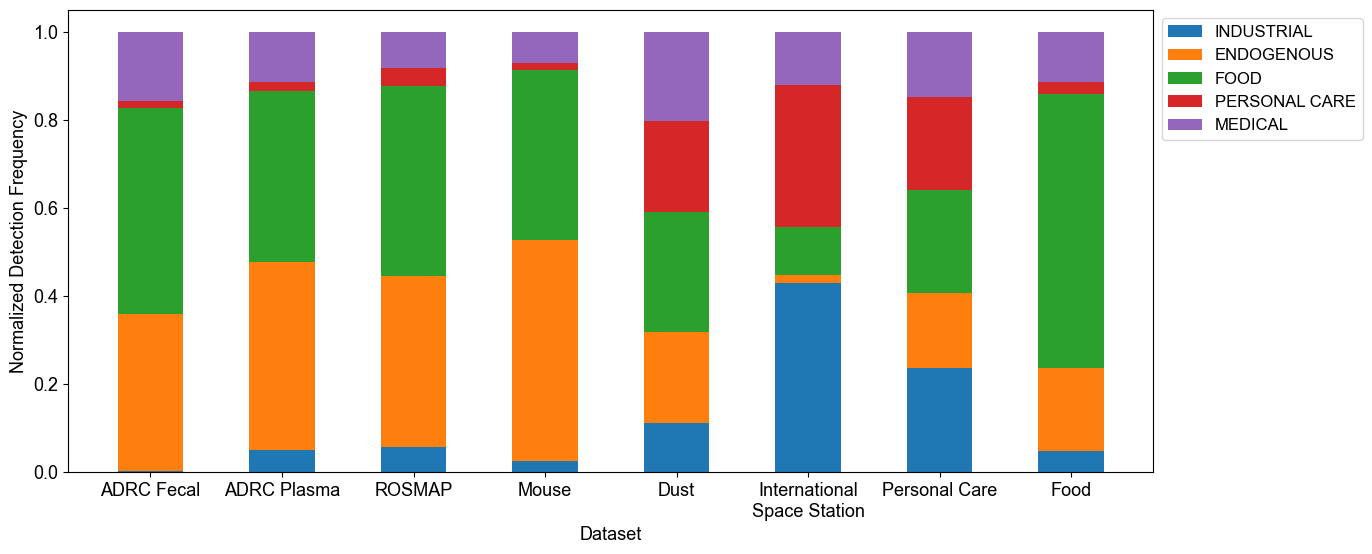

In [ ]:
# Make a stacked bar plot
dataset_names_reordered = (
    "ADRC Fecal",
    "ADRC Plasma",
    "ROSMAP",
    "Mouse",
    "Dust",
    "International\nSpace Station",
    "Personal Care",
    "Food",
)
datasets_reordered = [
    "adrc",
    "adrc_plasma",
    "rosmap",
    "mouse",
    "dust",
    "iss",
    "personal",
    "food",
]
# Make a list of the default colors, blue orange green red purple
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Create a color map for the categories
color_map = {
    "FOOD": colors[2],
    "ENDOGENOUS": colors[1],
    "INDUSTRIAL": colors[0],
    "PERSONAL CARE": colors[3],
    "MEDICAL": colors[4],
}
categories_reordered = ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]

weight_counts = {}
for category in categories_reordered:
    weight_counts[category] = []
    for dataset in datasets_reordered:
        weight_counts[category].append(dataset_dict_summed_wiped[dataset][category])
    weight_counts[category] = np.array(weight_counts[category])

width = 0.5
fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(datasets))
for category in categories_reordered:
    ax.bar(
        dataset_names_reordered,
        weight_counts[category],
        width,
        label=category,
        bottom=bottom,
        color=color_map[category],
    )
    bottom += weight_counts[category]

ax.set_ylabel("Normalized Detection Frequency")
ax.set_xlabel("Dataset")

# Keep the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

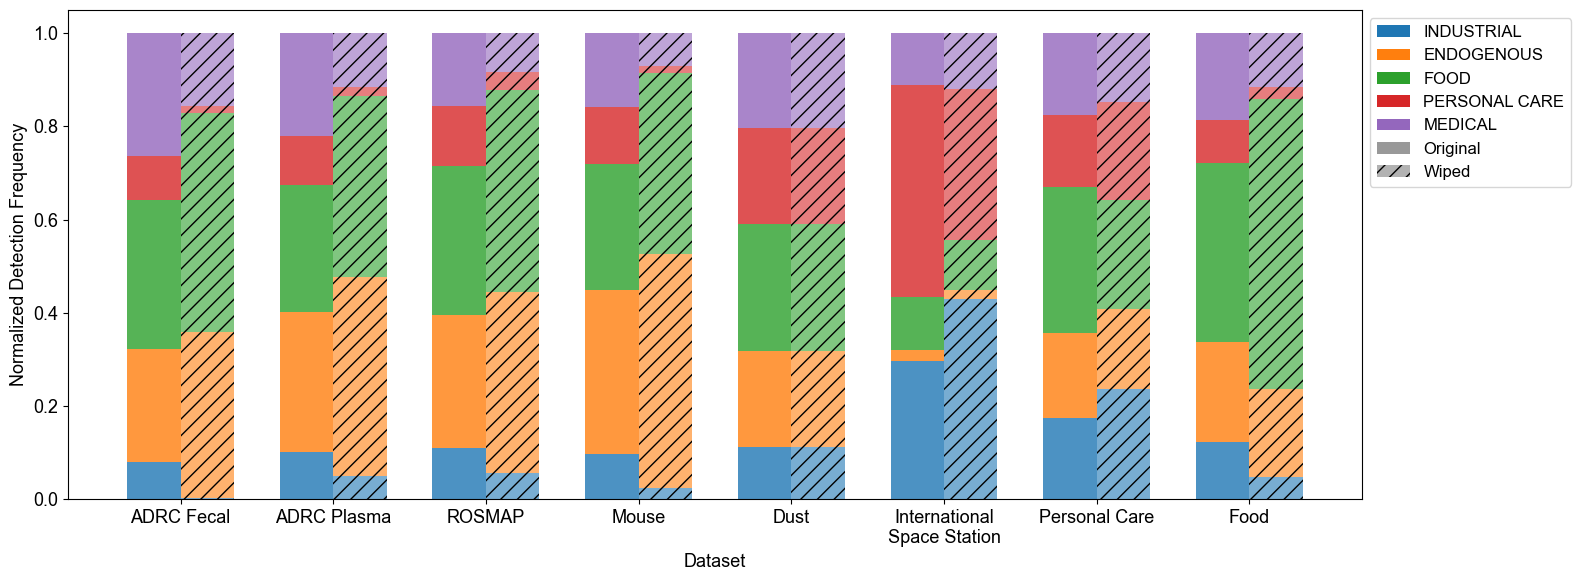

In [ ]:
# Make side-by-side stacked bar plots
dataset_names_reordered = (
    "ADRC Fecal",
    "ADRC Plasma",
    "ROSMAP",
    "Mouse",
    "Dust",
    "International\nSpace Station",
    "Personal Care",
    "Food",
)
datasets_reordered = [
    "adrc",
    "adrc_plasma",
    "rosmap",
    "mouse",
    "dust",
    "iss",
    "personal",
    "food",
]

# Make a list of the default colors, blue orange green red purple
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Create a color map for the categories
color_map = {
    "FOOD": colors[2],
    "ENDOGENOUS": colors[1],
    "INDUSTRIAL": colors[0],
    "PERSONAL CARE": colors[3],
    "MEDICAL": colors[4],
}

categories_reordered = ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]

# Prepare data for both plots
weight_counts_1 = {}
weight_counts_2 = {}

for category in categories_reordered:
    weight_counts_1[category] = []
    weight_counts_2[category] = []
    for dataset in datasets_reordered:
        weight_counts_1[category].append(dataset_dict_summed[dataset][category])
        weight_counts_2[category].append(dataset_dict_summed_wiped[dataset][category])
    weight_counts_1[category] = np.array(weight_counts_1[category])
    weight_counts_2[category] = np.array(weight_counts_2[category])

# Set up the plot
width = 0.35  # Width of each bar
x = np.arange(len(datasets_reordered))  # Label locations
fig, ax = plt.subplots(figsize=(16, 6))

# Plot first set of stacked bars (left bars)
bottom_1 = np.zeros(len(datasets_reordered))
for category in categories_reordered:
    ax.bar(
        x - width / 2,
        weight_counts_1[category],
        width,
        label=f"{category} (Original)" if category == categories_reordered[0] else None,
        bottom=bottom_1,
        color=color_map[category],
        alpha=0.8,
    )
    bottom_1 += weight_counts_1[category]

# Plot second set of stacked bars (right bars)
bottom_2 = np.zeros(len(datasets_reordered))
for category in categories_reordered:
    ax.bar(
        x + width / 2,
        weight_counts_2[category],
        width,
        label=f"{category} (Wiped)" if category == categories_reordered[0] else None,
        bottom=bottom_2,
        color=color_map[category],
        alpha=0.6,
        hatch="//",
    )
    bottom_2 += weight_counts_2[category]

# Customize the plot
ax.set_ylabel("Normalized Detection Frequency")
ax.set_xlabel("Dataset")
ax.set_xticks(x)
ax.set_xticklabels(dataset_names_reordered)

# Create custom legend
from matplotlib.patches import Patch

legend_elements = []
# Add category colors
for category in categories_reordered:
    legend_elements.append(Patch(facecolor=color_map[category], label=category))
# Add pattern legend
legend_elements.append(Patch(facecolor="gray", alpha=0.8, label="Original"))
legend_elements.append(Patch(facecolor="gray", alpha=0.6, hatch="//", label="Wiped"))

ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

plt.tight_layout()
plt.show()

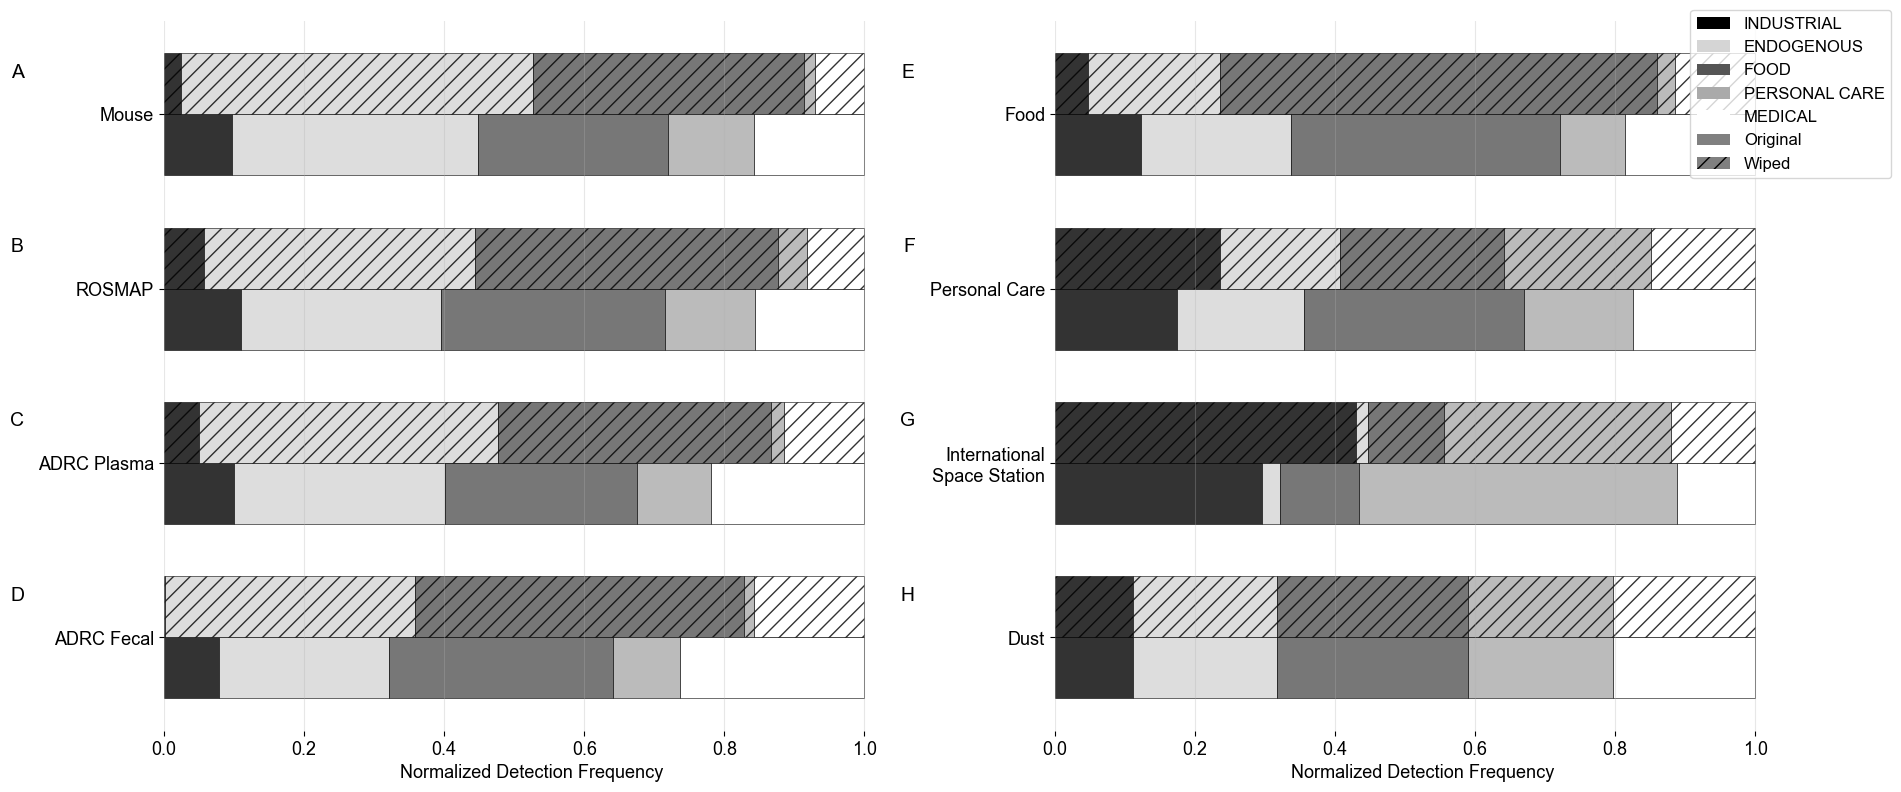

In [ ]:
# Make horizontal stacked bar plots split by dataset groups
# First group: ADRC Fecal, ADRC Plasma, ROSMAP, Mouse
# Second group: Dust, ISS, Personal Care, Food

dataset_names_group1 = ("ADRC Fecal", "ADRC Plasma", "ROSMAP", "Mouse")
datasets_group1 = ["adrc", "adrc_plasma", "rosmap", "mouse"]

dataset_names_group2 = ("Dust", "International\nSpace Station", "Personal Care", "Food")
datasets_group2 = ["dust", "iss", "personal", "food"]

# Create a black and white color map for the categories
color_map = {
    "INDUSTRIAL": "#000000",  # Black
    "ENDOGENOUS": "#404040",  # Dark gray
    "FOOD": "#808080",  # Medium gray
    "PERSONAL CARE": "#B0B0B0",  # Light gray
    "MEDICAL": "#FFFFFF",  # White
}


color_map = {
    "INDUSTRIAL": (0, 0, 0),
    "MEDICAL": (1.0, 1.0, 1.0),  # White
    "ENDOGENOUS": grayscale[4],  # Dark gray
    "FOOD": grayscale[1],
    "PERSONAL CARE": grayscale[3],  # Light gray
}
categories_reordered = ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]


# Prepare data for both groups and both datasets
def prepare_data(datasets, data_dict):
    weight_counts = {}
    for category in categories_reordered:
        weight_counts[category] = []
        for dataset in datasets:
            weight_counts[category].append(data_dict[dataset][category])
        weight_counts[category] = np.array(weight_counts[category])
    return weight_counts


weight_counts_1_group1 = prepare_data(datasets_group1, dataset_dict_summed)
weight_counts_2_group1 = prepare_data(datasets_group1, dataset_dict_summed_wiped)

weight_counts_1_group2 = prepare_data(datasets_group2, dataset_dict_summed)
weight_counts_2_group2 = prepare_data(datasets_group2, dataset_dict_summed_wiped)

# Set up the plot with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Remove spines for both subplots
for ax in [ax1, ax2]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

y_pos = np.arange(4)  # 4 datasets per group
bar_width = 0.35

# Plot first subplot (Group 1: ADRC Fecal, ADRC Plasma, ROSMAP, Mouse)
left_1_g1 = np.zeros(4)
left_2_g1 = np.zeros(4)

for category in categories_reordered:
    # Original data bars
    ax1.barh(
        y_pos - bar_width / 2,
        weight_counts_1_group1[category],
        bar_width,
        left=left_1_g1,
        label=f"{category} (Original)" if category == categories_reordered[0] else None,
        color=color_map[category],
        alpha=0.8,
        edgecolor="black",
        linewidth=0.5,
    )
    left_1_g1 += weight_counts_1_group1[category]

    # Wiped data bars
    ax1.barh(
        y_pos + bar_width / 2,
        weight_counts_2_group1[category],
        bar_width,
        left=left_2_g1,
        label=f"{category} (Wiped)" if category == categories_reordered[0] else None,
        color=color_map[category],
        alpha=0.8,
        hatch="//",
        edgecolor="black",
        linewidth=0.5,
    )
    left_2_g1 += weight_counts_2_group1[category]

# loop over ax1 and add letter annotations
for i, letter in enumerate(["D", "C", "B", "A"]):
    ax1.text(
        -0.2,
        y_pos[i] + 0.24,
        letter,
        va="center",
        ha="right",
        fontsize=14,
        fontweight="bold",
    )


ax1.set_xlabel("Normalized Detection Frequency")
ax1.set_yticks(y_pos)
ax1.set_yticklabels(dataset_names_group1)
ax1.grid(axis="x", alpha=0.3)

# Plot second subplot (Group 2: Dust, ISS, Personal Care, Food)
left_1_g2 = np.zeros(4)
left_2_g2 = np.zeros(4)

for category in categories_reordered:
    # Original data bars
    ax2.barh(
        y_pos - bar_width / 2,
        weight_counts_1_group2[category],
        bar_width,
        left=left_1_g2,
        color=color_map[category],
        alpha=0.8,
        edgecolor="black",
        linewidth=0.5,
    )
    left_1_g2 += weight_counts_1_group2[category]

    # Wiped data bars
    ax2.barh(
        y_pos + bar_width / 2,
        weight_counts_2_group2[category],
        bar_width,
        left=left_2_g2,
        color=color_map[category],
        alpha=0.8,
        hatch="//",
        edgecolor="black",
        linewidth=0.5,
    )
    left_2_g2 += weight_counts_2_group2[category]


# loop over ax2 and add letter annotations
for i, letter in enumerate(["H", "G", "F", "E"]):
    ax2.text(
        -0.2,
        y_pos[i] + 0.24,
        letter,
        va="center",
        ha="right",
        fontsize=14,
        fontweight="bold",
    )

ax2.set_xlabel("Normalized Detection Frequency")
ax2.set_yticks(y_pos)
ax2.set_yticklabels(dataset_names_group2)
ax2.grid(axis="x", alpha=0.3)

# Create custom legend
from matplotlib.patches import Patch

legend_elements = []
# Add category colors
for category in categories_reordered:
    legend_elements.append(Patch(facecolor=color_map[category], label=category))
# Add pattern legend
legend_elements.append(Patch(facecolor="gray", alpha=1, label="Original"))
legend_elements.append(Patch(facecolor="gray", alpha=1, hatch="//", label="Wiped"))

# Place legend outside the plots
fig.legend(
    handles=legend_elements, loc="upper right", bbox_to_anchor=(1.05, 1), fontsize=12
)

plt.tight_layout()
plt.show()

In [73]:
all_groups["mouse"]

,X.Scan.,synonyms,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_gpt-4o_classification,chemsource_output_gpt-4o_classprobs,detection_mapper,DF
47,20188.0,"('N-acetyl-l-methionine', 'N-acetylmethionine'...",Two experiments were conducted to investigate...,N-acetyl-l-methionine,PUBMED,"(FOOD, [(FO, -0.25602394342422485), (OD, 0.0)])",FOOD,{'FOOD': 1.0},mouse_20188,0.377483
48,18064.0,"('N-acetyl-dl-methionine', 'Ac-dl-met-oh', 'Ac...","In this study, lipase-catalyzed resolution of...",N-acetyl-dl-methionine,PUBMED,"(INFO, [(INFO, -9.639096970204264e-05)])",INFO,{'INFO': 0.9999036136757582},mouse_18064,0.139073
49,38287.0,"('Hexanoylglycine', 'Hexanoyl glycine', 'N-cap...",Medium-chain acyl-CoA dehydrogenase (MCAD) de...,Hexanoylglycine,PUBMED,"(ENDOGENOUS, [(END, -0.011054071597754955), (O...",ENDOGENOUS,{'ENDOGENOUS': 1.0},mouse_38287,0.311258
50,6294.0,"('Adenosine', 'Adenocard', 'Adenoscan', 'Adeni...",Adenosine (symbol A) is an organic compound th...,Adenosine,WIKIPEDIA,"(MEDICAL, ENDOGENOUS, [(MED, -0.47419226169586...","MEDICAL, ENDOGENOUS","{'MEDICAL': 0.6223875797722378, 'ENDOGENOUS': ...",mouse_6294,0.791391
51,1720.0,"('Histidine', 'H-his-oh', 'Glyoxaline-5-alanin...",Histidine (symbol His or H) is an essential am...,Histidine,WIKIPEDIA,"(FOOD, [(FO, -0.008838512934744358), (OD, 0.0)])",FOOD,{'FOOD': 1.0},mouse_1720,0.364238
...,...,...,...,...,...,...,...,...,...,...
317,3510.0,"('Pimelic acid', 'Heptanedioic acid', 'Pileric...",Pimelic acid is the organic compound with the ...,Pimelic acid,WIKIPEDIA,"(INDUSTRIAL, [(IND, -0.47469037771224976), (U,...",INDUSTRIAL,{'INDUSTRIAL': 1.0},mouse_3510,0.152318
318,3199.0,"('Allantoin', 'Glyoxyldiureide', 'Cordianine',...",Allantoin is a chemical compound with formula ...,Allantoin,WIKIPEDIA,"(PERSONAL CARE, MEDICAL, [(PERSON, -0.16348072...","PERSONAL CARE, MEDICAL","{'PERSONAL CARE': 0.8491828635617854, 'MEDICAL...",mouse_3199,0.099338
319,55570.0,"('Azuleno[4,5-b]furan-2(3h)-one, decahydro-3,6...",Nitric oxide (NO) and tumor necrosis factor a...,Dehydrocostus lactone;epiligulyl oxide,PUBMED,"(INFO, [(INFO, -0.06306792050600052)])",INFO,{'INFO': 0.9388797023390101},mouse_55570,0.129139
320,62759.0,"('Prostaglandin bx', 'Postaglandin b1', 'Prost...",The effect of Prostaglandin Bx (PGBx) on the ...,Prostaglandin bx,PUBMED,"(INFO, [(INFO, -3.547789674485102e-05)])",INFO,{'INFO': 0.9999645227325883},mouse_62759,0.039735


In [ ]:
# Sample chemicals from each dataset and category
sampled_data = {
    "adrc": {
        "FOOD": [
            "Pantothenic acid",
            0.990783410138249,
            "CC(C)(CO)[C@H](C(=O)NCCC(=O)O)O",
            "Pantothenic acid",
        ],
        "ENDOGENOUS": [
            "Tyrosine",
            0.972350230414747,
            "C1=CC(=CC=C1C[C@@H](C(=O)O)N)O",
            "Tyrosine",
        ],
        "INDUSTRIAL": [
            "Diphenylguanidine",
            0.0537634408602151,
            "C1=CC=C(C=C1)NC(=NC2=CC=CC=C2)N",
            "Diphenylguanidine",
        ],
        "PERSONAL CARE": [
            "Linoleoyl ethanolamide",
            0.976958525345622,
            "CCCCC/C=C\C/C=C\CCCCCCCC(=O)NCCO",
            "Linoleoyl ethanolamide",
        ],
        "MEDICAL": [
            "Methyldopa",
            0.956989247311828,
            "C[C@](CC1=CC(=C(C=C1)O)O)(C(=O)O)N",
            "Methyldopa",
        ],
    },
    "adrc_plasma": {
        "FOOD": ["Vanillin", 0.952599388379205, "COC1=C(C=CC(=C1)C=O)O", "Vanillin"],
        "ENDOGENOUS": [
            "Glutamine",
            0.987767584097859,
            "C(CC(=O)N)[C@@H](C(=O)O)N",
            "Glutamine",
        ],
        "INDUSTRIAL": [
            "Hexaethylene glycol",
            0.785932721712538,
            "C(COCCOCCOCCOCCOCCO)O",
            "Hexaethylene glycol",
        ],
        "PERSONAL CARE": [
            "Retinol",
            0.954128440366973,
            "CC1=C(C(CCC1)(C)C)/C=C/C(=C/C=C/C(=C/CO)/C)/C",
            "Retinol",
        ],
        "MEDICAL": [
            "Acetaminophen",
            0.729357798165138,
            "CC(=O)NC1=CC=C(C=C1)O",
            "Acetaminophen",
        ],
    },
    "dust": {
        "FOOD": [
            "Sorbitan palmitate",
            0.848181818181818,
            "CCCCCCCCCCCCCCCC(=O)OC[C@H](C1[C@@H]([C@H](CO1)O)O)O",
            "Sorbitan palmitate",
        ],
        "ENDOGENOUS": [
            "Histidylproline",
            0.611818181818182,
            "C1C[C@H](N(C1)C(=O)[C@H](CC2=CN=CN2)N)C(=O)O",
            "Histidylproline",
        ],
        "INDUSTRIAL": [
            "Tetraethylene glycol monododecyl ether",
            0.754545454545455,
            "CCCCCCCCCCCCOCCOCCOCCOCCO",
            "Tetraethylene glycol monododecyl ether",
        ],
        "PERSONAL CARE": [
            "Ensulizole",
            0.498181818181818,
            "C1=CC=C(C=C1)C2=NC3=C(N2)C=C(C=C3)S(=O)(=O)O",
            "Ensulizole",
        ],
        "MEDICAL": [
            "Benzododecinium",
            0.828181818181818,
            "CCCCCCCCCCCC[N+](C)(C)CC1=CC=CC=C1",
            "Benzododecinium",
        ],
    },
    "food": {
        "FOOD": [
            "Guanosine",
            0.83789062,
            "C1=NC2=C(N1[C@H]3[C@@H]([C@@H]([C@H](O3)CO)O)O)N=C(NC2=O)N ",
            "Guanosine",
        ],
        "ENDOGENOUS": ["Wampocap", 0.7734375, "C1=CC(=CN=C1)C(=O)O", "Wampocap"],
        "INDUSTRIAL": [
            "Phenylalanine methyl ester",
            0.751953125,
            "COC(=O)[C@H](CC1=CC=CC=C1)N",
            "Phenylalanine methyl ester",
        ],
        "PERSONAL CARE": ["Ectoine", 0.48828125, "CC1=NCC[C@H](N1)C(=O)O", "Ectoine"],
        "MEDICAL": [
            "Lactoflavin",
            0.72265625,
            "CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]([C@@H]([C@@H](CO)O)O)O",
            "Lactoflavin",
        ],
    },
    "iss": {
        "FOOD": [
            "Phenylalanine",
            0.228215767634855,
            "C1=CC=C(C=C1)C[C@@H](C(=O)O)N",
            "Phenylalanine",
        ],
        "ENDOGENOUS": [
            "Phenylacetylglutamine",
            0.0401106500691563,
            "C1=CC=C(C=C1)CC(=O)N[C@@H](CCC(=O)N)C(=O)O",
            "Phenylacetylglutamine",
        ],
        "INDUSTRIAL": [
            "Lauramine oxide",
            0.467496542185339,
            "CCCCCCCCCCCC[N+](C)(C)[O-]",
            "Lauramine oxide",
        ],
        "PERSONAL CARE": [
            "Lauric acid monoethanolamide",
            0.34716459197787,
            "CCCCCCCCCCCC(=O)NCCO",
            "Lauric acid monoethanolamide",
        ],
        "MEDICAL": [
            "Ketoconazole",
            0.0525587828492393,
            "CC(=O)N1CCN(CC1)C2=CC=C(C=C2)OC[C@@H]3CO[C@@](O3)(CN4C=CN=C4)C5=C(C=C(C=C5)Cl)Cl",
            "Ketoconazole",
        ],
    },
    "mouse": {
        "FOOD": [
            "Alloisoleucine",
            0.887417218543046,
            "CC[C@@H](C)[C@@H](C(=O)O)N ",
            "Alloisoleucine",
        ],
        "ENDOGENOUS": [
            "Palmitoyl carnitine",
            0.903973509933775,
            "CCCCCCCCCCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C",
            "Palmitoyl carnitine",
        ],
        "INDUSTRIAL": [
            "Methyl ricinoleate",
            0.45364238410596,
            "CCCCCC[C@H](C/C=C\CCCCCCCC(=O)OC)O",
            "Methyl ricinoleate",
        ],
        "PERSONAL CARE": [
            "Jasmine lactone",
            0.678807947019868,
            "CC/C=C\CC1CCCC(=O)O1",
            "Jasmine lactone",
        ],
        "MEDICAL": [
            "Galnac",
            0.774834437086093,
            "O[C@@H](C(CO)O[C@H](O)[C@H]1NC(C)=O)[C@H]1O",
            "GalNAc",
        ],
    },
    "personal": {
        "FOOD": [
            "Trans-resveratrol",
            0.245119306,
            "Oc1ccc(cc1)\C=C\c2cc(O)cc(O)c2",
            "trans-Resveratrol",
        ],
        "ENDOGENOUS": ["N-methyltyramine"],
        "INDUSTRIAL": [
            "Methylisothiazolinone",
            0.373101952,
            "O=C1/C=C\SN1C",
            "Methylisothiazolinone",
        ],
        "PERSONAL CARE": [
            "Benzylparaben",
            0.245119306,
            "C1=CC=C(C=C1)COC(=O)C2=CC=C(C=C2)O ",
            "Benzylparaben",
        ],
        "MEDICAL": [
            "Versene",
            0.301518438,
            "C(CN(CC(=O)O)CC(=O)O)N(CC(=O)O)CC(=O)O",
            "Versene",
        ],
    },
    "rosmap": {
        "FOOD": [],
        "ENDOGENOUS": [],
        "INDUSTRIAL": [],
        "PERSONAL CARE": [],
        "MEDICAL": [],
    },
}

<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipykernel_6479/4150340775.py:7: SyntaxWarning: invalid escape sequence '\C'
  "PERSONAL CARE": ["Linoleoyl ethanolamide", 0.976958525345622, "CCCCC/C=C\C/C=C\CCCCCCCC(=O)NCCO", "Linoleoyl ethanolamide"],


Make Upset Plots

In [ ]:
all_groups_thresholded_upsets = {}

for dataset in datasets:
    updated_dataframe = all_groups[dataset].copy()
    # updated_dataframe = updated_dataframe[updated_dataframe["DF"] > 0.05]
    updated_dataframe = cs_output_to_upset_probs(
        updated_dataframe,
        "chemsource_output_gpt-4o_classification",
        "chemsource_output_gpt-4o_classprobs",
    )
    updated_dataframe = updated_dataframe[updated_dataframe["INFO"] == 0]
    updated_dataframe = updated_dataframe.drop(columns=["INFO"])[
        ["INDUSTRIAL", "ENDOGENOUS", "FOOD", "PERSONAL CARE", "MEDICAL"]
    ]
    updated_dataframe["summed_probs"] = updated_dataframe.sum(axis=1)
    updated_dataframe = updated_dataframe[updated_dataframe["summed_probs"] > 0]
    updated_dataframe = updated_dataframe.drop(columns=["summed_probs"])
    updated_dataframe = updated_dataframe.applymap(lambda x: True if x > 0.5 else False)
    all_groups_thresholded_upsets[dataset] = updated_dataframe

/home/prajitrr/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)
/tmp/ipykernel_49031/2447162881.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  updated_dataframe = updated_dataframe.applymap(lambda x: True if x > 0.5 else False)
/home/prajitrr/Documents/GitHub/chemsource-final-dataset-analysis/pipeline/helpers/visualization.py:84: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=

In [72]:
all_groups_thresholded_upsets["mouse"]

,INDUSTRIAL,ENDOGENOUS,FOOD,PERSONAL CARE,MEDICAL
47,False,False,True,False,False
49,False,True,False,False,False
50,False,True,False,False,True
51,False,False,True,False,False
52,False,False,False,False,True
...,...,...,...,...,...
313,True,False,False,False,False
315,False,False,True,True,False
316,True,False,True,True,True
317,True,False,False,False,False


In [37]:
all_groups["adrc"]

,X.Scan.,synonyms,text,name_used,site,chemsource_output_gpt-4o,chemsource_output_gpt-4o_classification,chemsource_output_gpt-4o_classprobs,detection_mapper,DF
814,20962.0,"('Quetiapine', 'Seroquel', 'Quetiapine fumarat...","Quetiapine, sold under the brand name Seroquel...",Quetiapine,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",MEDICAL,{'MEDICAL': 1.0},adrc_20962,0.006144
815,23662.0,"('Raloxifene', 'Keoxifene', 'Raloxifenum', 'Ra...","Raloxifene, sold under the brand name Evista a...",Raloxifene,WIKIPEDIA,"(MEDICAL, [(MED, 0.0), (ICAL, 0.0)])",MEDICAL,{'MEDICAL': 1.0},adrc_23662,0.007680
816,4487.0,"('Mannitol', 'Mannite', 'Osmitrol', 'Manna sug...",Mannitol is a type of sugar alcohol used as a ...,Mannitol,WIKIPEDIA,"(MEDICAL, FOOD, [(MED, -0.0003357006062287837)...","MEDICAL, FOOD","{'MEDICAL': 0.999664355734915, 'FOOD': 0.99998...",adrc_4487,0.734255
817,48467.0,"('Pheophorbide a', 'Phaeophorbid a', 'Phaeopho...",Pheophorbide or phaeophorbide is a product of ...,Pheophorbide a,WIKIPEDIA,"(MEDICAL, FOOD, [(MED, -0.10308293253183365), ...","MEDICAL, FOOD","{'MEDICAL': 0.9020521609098111, 'FOOD': 0.9999...",adrc_48467,0.755760
818,10066.0,"('Hippuric acid', 'N-benzoylglycine', 'Benzoyl...","Hippuric acid (Gr. hippos, horse, ouron, urine...",Hippuric acid,WIKIPEDIA,"(ENDOGENOUS, FOOD, [(END, -2.0339031834737398e...","ENDOGENOUS, FOOD","{'ENDOGENOUS': 0.9959092919220177, 'FOOD': 0.9...",adrc_10066,0.377880
...,...,...,...,...,...,...,...,...,...,...
1113,11287.0,"('Proposed tyr-c3:0',)",Working memory is the fundamental function by...,Proposed tyr-c3:0,PUBMED,"(INFO, [(INFO, -2.1008713702030946e-06)])",INFO,{'INFO': 0.9999978991308366},adrc_11287,0.840246
1114,48090.0,"('N-(1,3-dihydroxyoctadec-4-en-2-yl)octadecana...","Vesicles, recently claimed as drug delivery c...","N-[1,3-dihydroxyoctadec-4-en-2-yl]octadecanamide",PUBMED,"(INFO, [(INFO, -3.7697225252486533e-06)])",INFO,{'INFO': 0.9999962302845802},adrc_48090,0.001536
1115,19178.0,"('Lys-c8:1',)","The title compound, C T-cell help to B cells ...",Lys-c8:1,PUBMED,"(INFO, [(INFO, 0.0)])",INFO,{'INFO': 1.0},adrc_19178,0.039939
1116,29608.0,"('Mevastatin',)","Mevastatin (compactin, ML-236B) is a hypolipid...",Mevastatin,WIKIPEDIA,"(MEDICAL, FOOD, [(MED, -0.11021870374679565), ...","MEDICAL, FOOD","{'MEDICAL': 0.8956382344375382, 'FOOD': 0.9999...",adrc_29608,0.073733


In [35]:
list(all_groups_thresholded_upsets.items())[0]

('adrc',
       INDUSTRIAL  ENDOGENOUS   FOOD  PERSONAL CARE  MEDICAL
 816        False       False   True          False     True
 817        False       False   True          False     True
 818        False        True   True          False    False
 819        False       False   True           True    False
 820        False        True  False          False    False
 ...          ...         ...    ...            ...      ...
 1103        True       False   True          False    False
 1104       False        True   True           True    False
 1105        True        True   True          False    False
 1112       False       False  False          False     True
 1116       False       False   True          False     True
 
 [135 rows x 5 columns])

/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/prajitrr/miniconda3/envs/chemsource/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

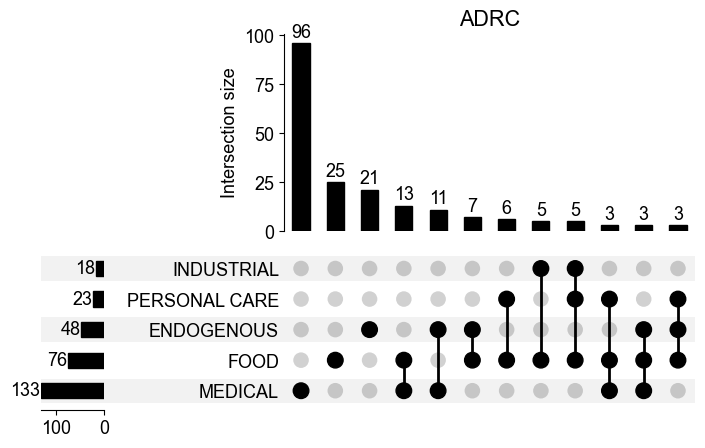

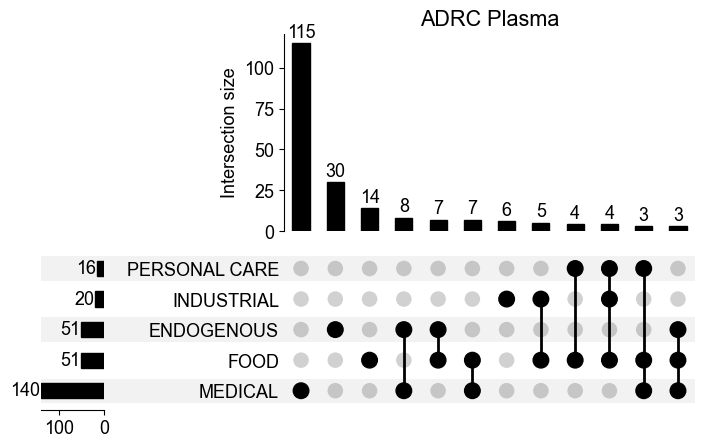

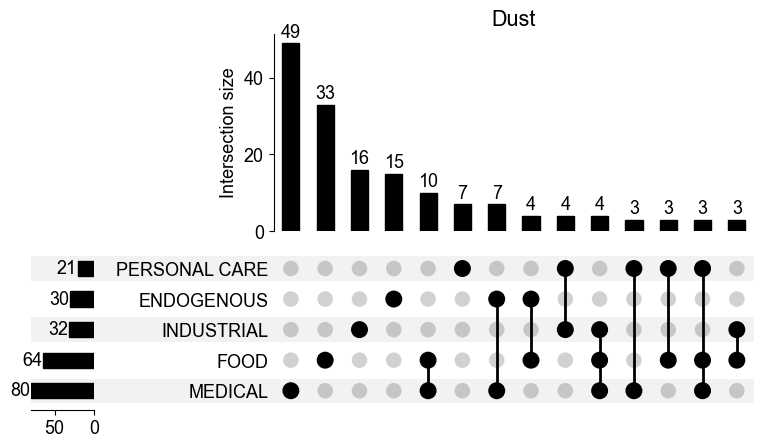

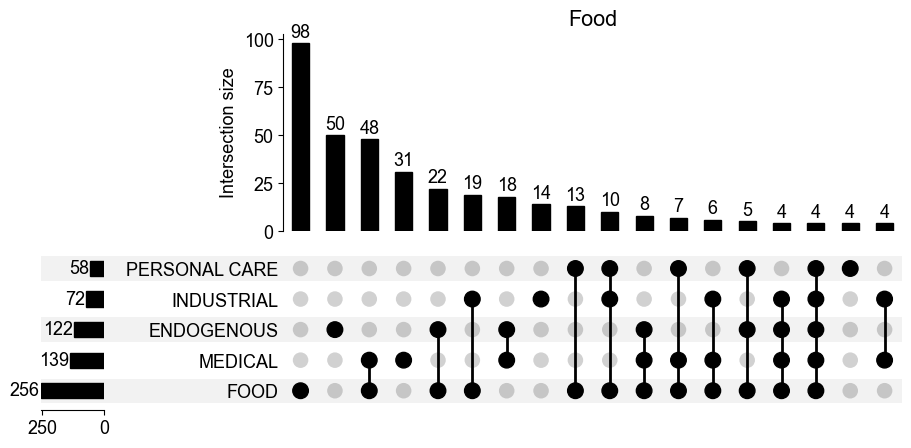

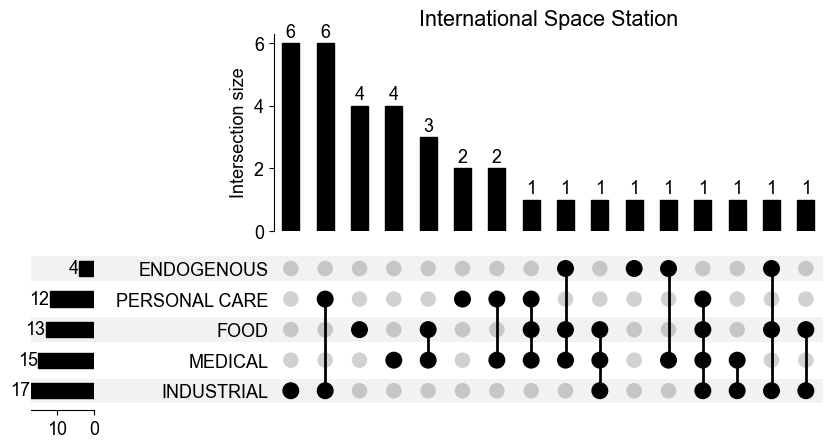

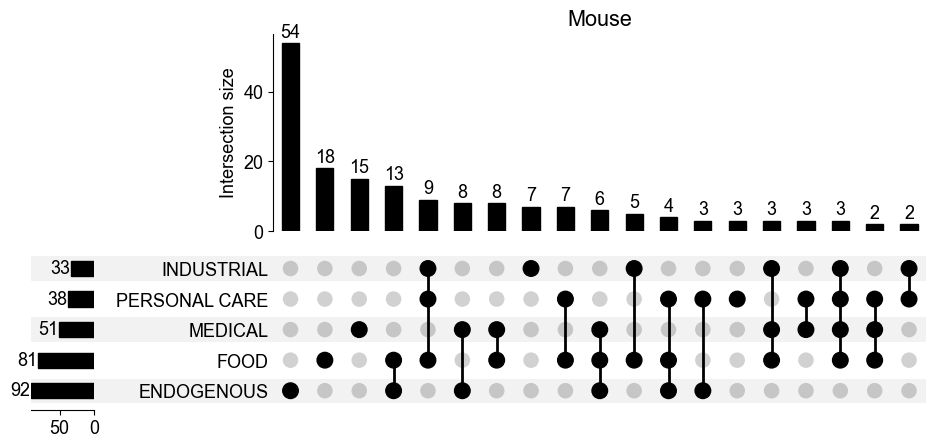

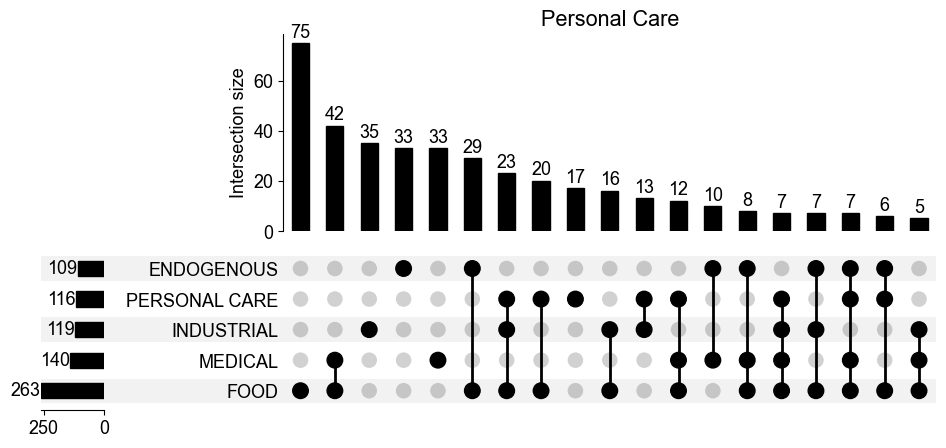

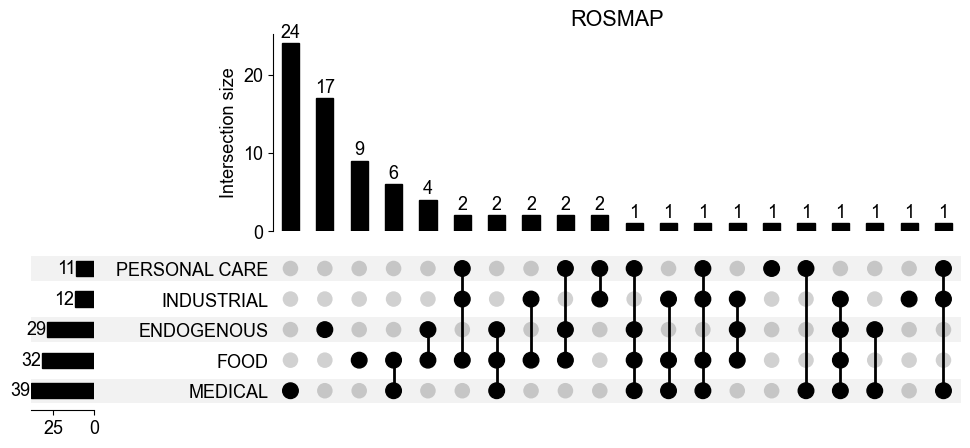

In [ ]:
dataset_names_reordered_upset = (
    "ADRC",
    "ADRC Plasma",
    "Dust",
    "Food",
    "International Space Station",
    "Mouse",
    "Personal Care",
    "ROSMAP",
)

for i, group in enumerate(list(all_groups_thresholded_upsets.items())):
    real_group = group[1]
    plt.rcParams.update({"font.size": 13})
    plt.rcParams["font.family"] = ["Arial", "sans-serif"]
    fig = plot(
        from_indicators(real_group),
        subset_size="count",
        show_counts=True,
        min_subset_size="1%",
        sort_by="cardinality",
    )
    ax = fig["intersections"]
    ax.grid(False, axis="y")
    ax2 = fig["totals"]
    ax2.xaxis.grid(False)
    plt.title(dataset_names_reordered_upset[i])